# Seurat clustering of Set 1 (C1HT, Trypsin)

In [1]:
#loading packages
library(ggplot2)
library(magrittr)
library(data.table)
library(Seurat)
library(Matrix)
library(dplyr)
library(MAST)
library(RColorBrewer)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘matrixStats’


The following object is masked from ‘package:dplyr’:

    count



Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
 

In [2]:
count.table <- read.csv(file = '../../data/original_data/Set1/umi_count_table_HQC_Set1.csv')
head(count.table)
dim(count.table)

batch1_col1CATCTG batch1_col1CGTCAT batch1_col1CTAGTC
Myo81F         0                 0                 0                
CR41571        0                 0                 0                
CR12798        0                 0                 0                
lncRNA:CR46123 0                 0                 0                
lncRNA:CR46122 0                 0                 0                
CR40182        0                 0                 0                
               batch1_col1GACTCA batch1_col1GCTGAT batch1_col1GTCTAC
Myo81F         0                 0                 0                
CR41571        0                 0                 0                
CR12798        0                 0                 0                
lncRNA:CR46123 0                 0                 0                
lncRNA:CR46122 1                 0                 0                
CR40182        0                 0                 0                
               batch1_col1TACGAG batch1_col1TAGTCG batch1_col1TCAGAC
Myo81F         0                 0                 0                
CR41571        0                 0                 0                
CR12798        0                 0                 0                
lncRNA:CR46123 0                 0                 0                
lncRNA:CR46122 0                 0                 0                
CR40182        0                 1                 0                
               batch1_col1TCTAGC ⋯ batch4_col20CTAGTC batch4_col20CTCGAT
Myo81F         0                 ⋯ 0                  0                 
CR41571        0                 ⋯ 0                  0                 
CR12798        0                 ⋯ 0                  0                 
lncRNA:CR46123 0                 ⋯ 0                  0                 
lncRNA:CR46122 0                 ⋯ 0                  0                 
CR40182        0                 ⋯ 0                  0                 
               batch4_col20GAGCTA batch4_col20GCATCT batch4_col20GTGCAT
Myo81F         0                  0                  0                 
CR41571        0                  0                  0                 
CR12798        0                  0                  0                 
lncRNA:CR46123 0                  0                  0                 
lncRNA:CR46122 0                  0                  0                 
CR40182        0                  0                  0                 
               batch4_col20TACTGC batch4_col20TCACGT batch4_col20TCTCAG
Myo81F         0                  0                  0                 
CR41571        0                  0                  0                 
CR12798        0                  0                  0                 
lncRNA:CR46123 0                  0                  0                 
lncRNA:CR46122 0                  0                  0                 
CR40182        0                  0                  0                 
               batch4_col20TGCATC batch4_col20TGTACG
Myo81F         0                  0                 
CR41571        0                  0                 
CR12798        0                  0                 
lncRNA:CR46123 0                  0                 
lncRNA:CR46122 0                  0                 
CR40182        1                  0

[1] 17596  1243

In [3]:
seu_HQC <- CreateSeuratObject(count.table) 
seu_HQC

An object of class Seurat 
17596 features across 1243 samples within 1 assay 
Active assay: RNA (17596 features, 0 variable features)

In [4]:
is.mt <- grepl(pattern = '^mt:', x = row.names(seu_HQC))
is.rRNA <- grepl(pattern = 'rRNA', x = row.names(seu_HQC))
is.rRNA <- is.rRNA & (!is.mt)
mt.list <- row.names(seu_HQC)[is.mt]
rRNA_list <- row.names(seu_HQC)[is.rRNA]
head(rRNA_list)

[1] "5SrRNA:CR33452" "5SrRNA:CR33451" "5SrRNA:CR33450" "5SrRNA:CR33449"
[5] "5SrRNA:CR33448" "5SrRNA:CR33447"

In [5]:
seu_HQC[["percent.mt"]] <- PercentageFeatureSet(seu_HQC, pattern = "^mt:")
seu_HQC[["percent.rRNA"]] <- PercentageFeatureSet(seu_HQC, features = rRNA_list)
seu_HQC[["percent.ERCC"]] <- PercentageFeatureSet(seu_HQC, pattern = '^ERCC')

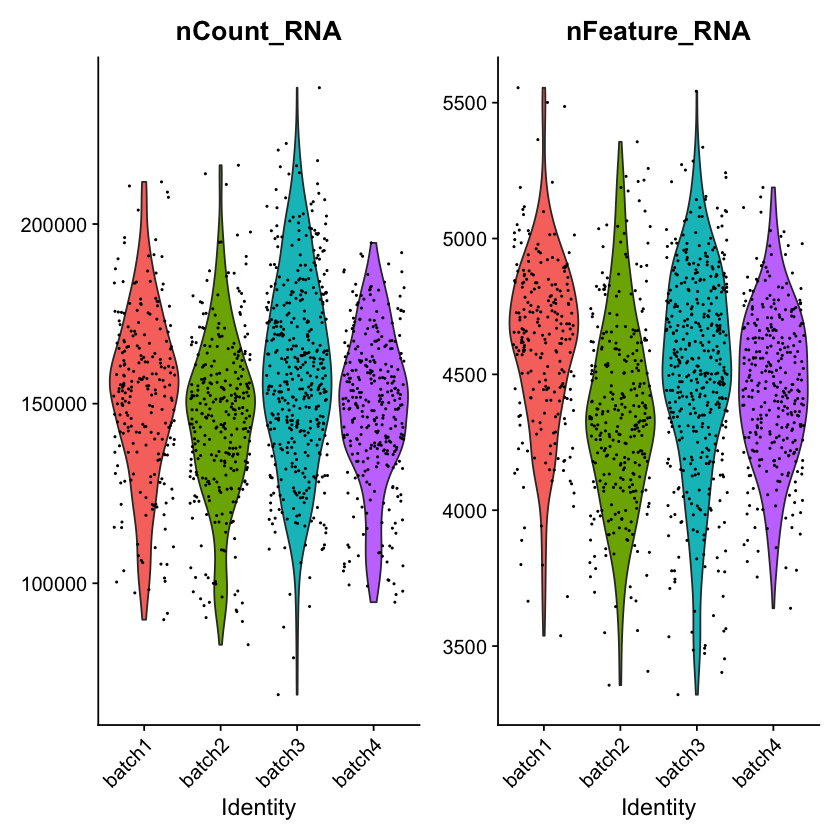

In [6]:
VlnPlot(seu_HQC, c("nCount_RNA", "nFeature_RNA"), pt.size = 0.2)

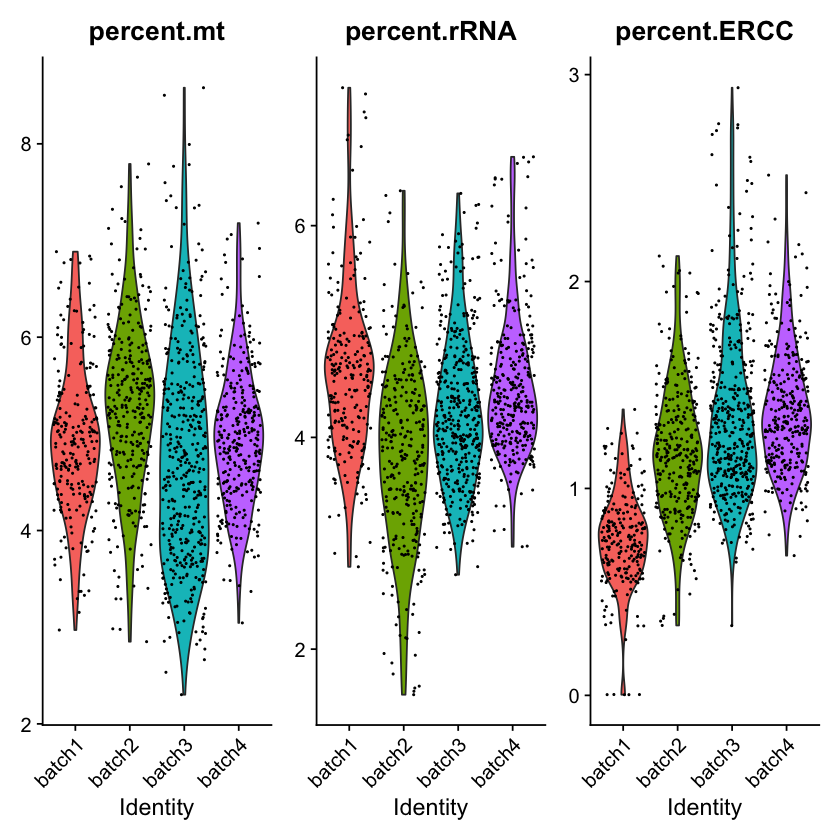

In [7]:
VlnPlot(seu_HQC, c("percent.mt", "percent.rRNA", "percent.ERCC"), pt.size = 0.2)

## Normalize, DR and Clustering

In [8]:
seu_HQC <- suppressWarnings(SCTransform(seu_HQC, vars.to.regress=c("percent.mt", "percent.rRNA", "percent.ERCC"), verbose = FALSE))

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


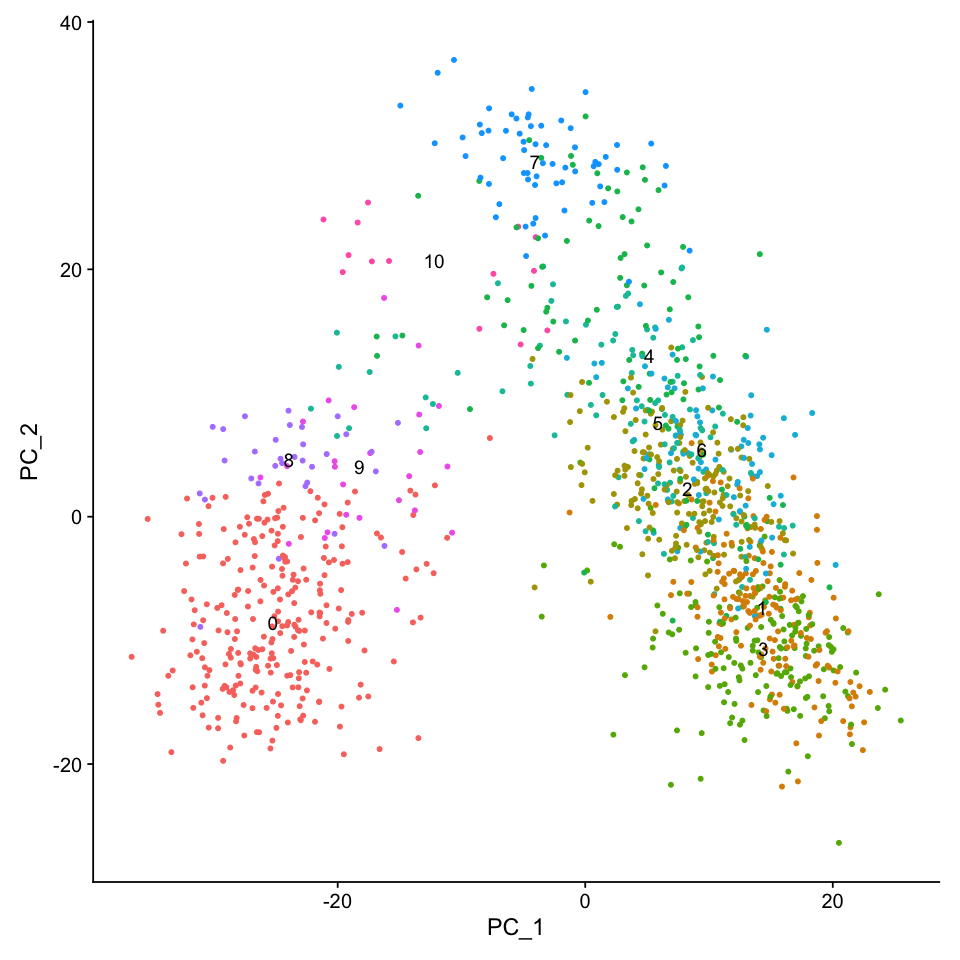

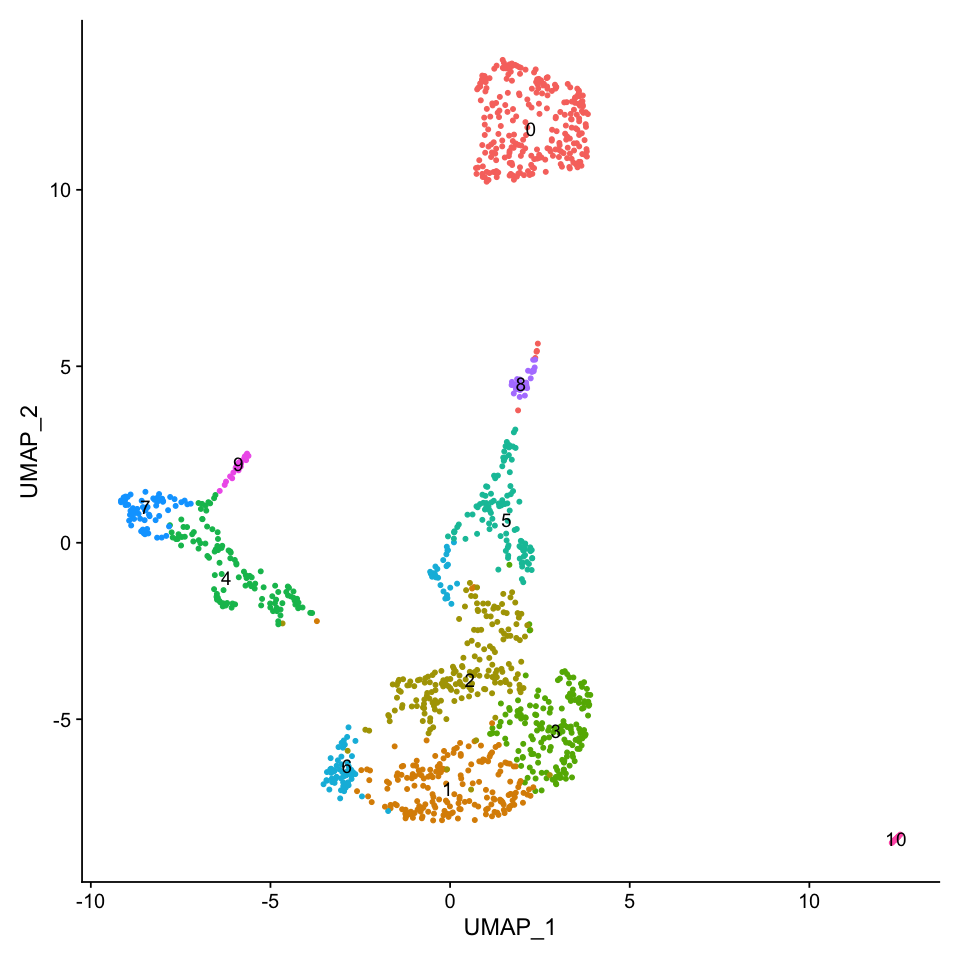

In [9]:
seu_HQC <- RunPCA(seu_HQC, verbose = FALSE)
seu_HQC <- RunUMAP(seu_HQC, dims = 1:30, verbose = FALSE, n.neighbors = 20L)
seu_HQC <- FindNeighbors(seu_HQC, dims = 1:30, verbose = FALSE)
seu_HQC <- FindClusters(seu_HQC, verbose = FALSE)
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu_HQC, reduction =  "pca", label = TRUE) + NoLegend()
DimPlot(seu_HQC, reduction =  "umap", label = TRUE) + NoLegend()

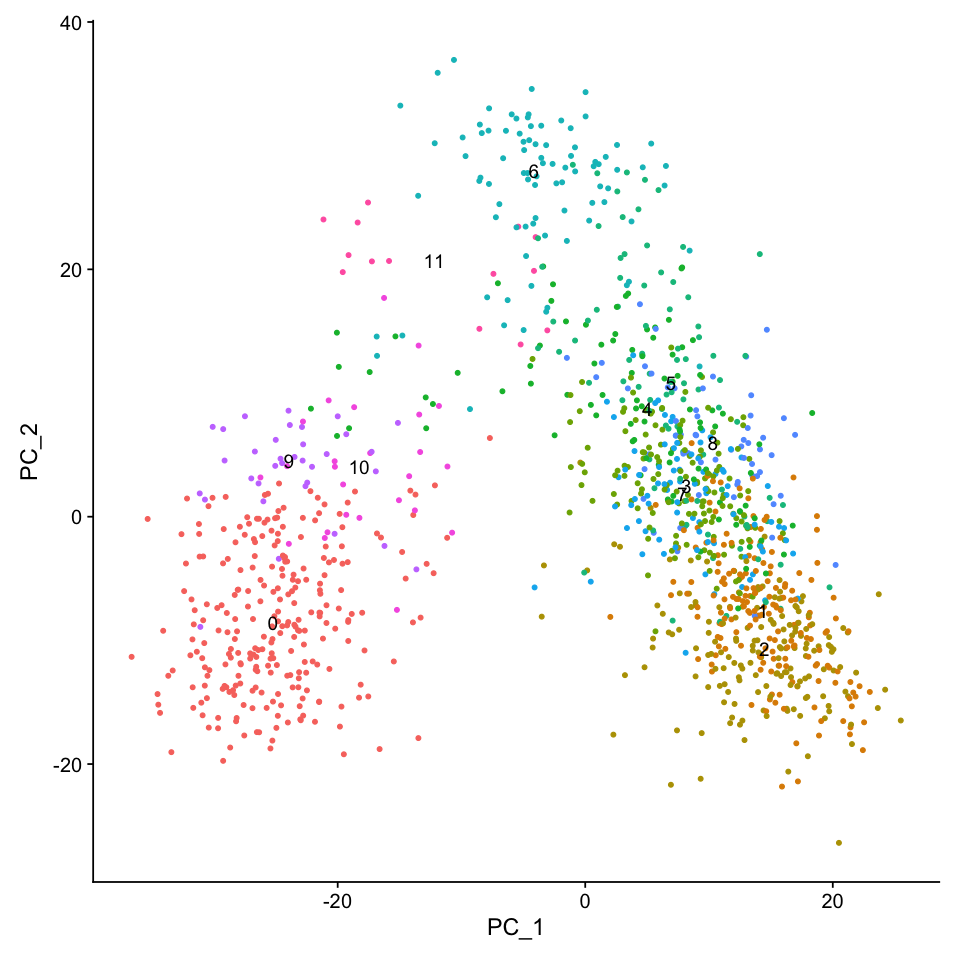

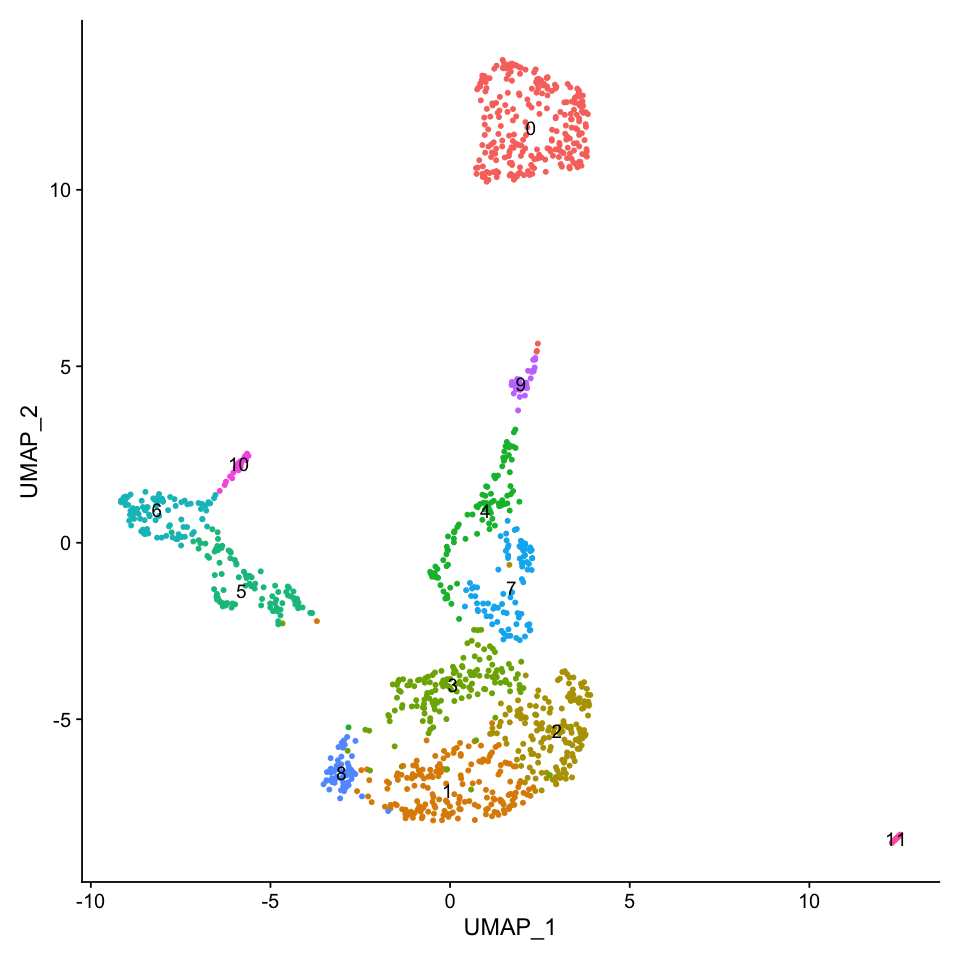

In [10]:
seu_HQC <- FindClusters(seu_HQC, verbose = FALSE, resolution = 1.2)
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu_HQC, reduction =  "pca", label = TRUE) + NoLegend()
DimPlot(seu_HQC, reduction =  "umap", label = TRUE) + NoLegend()

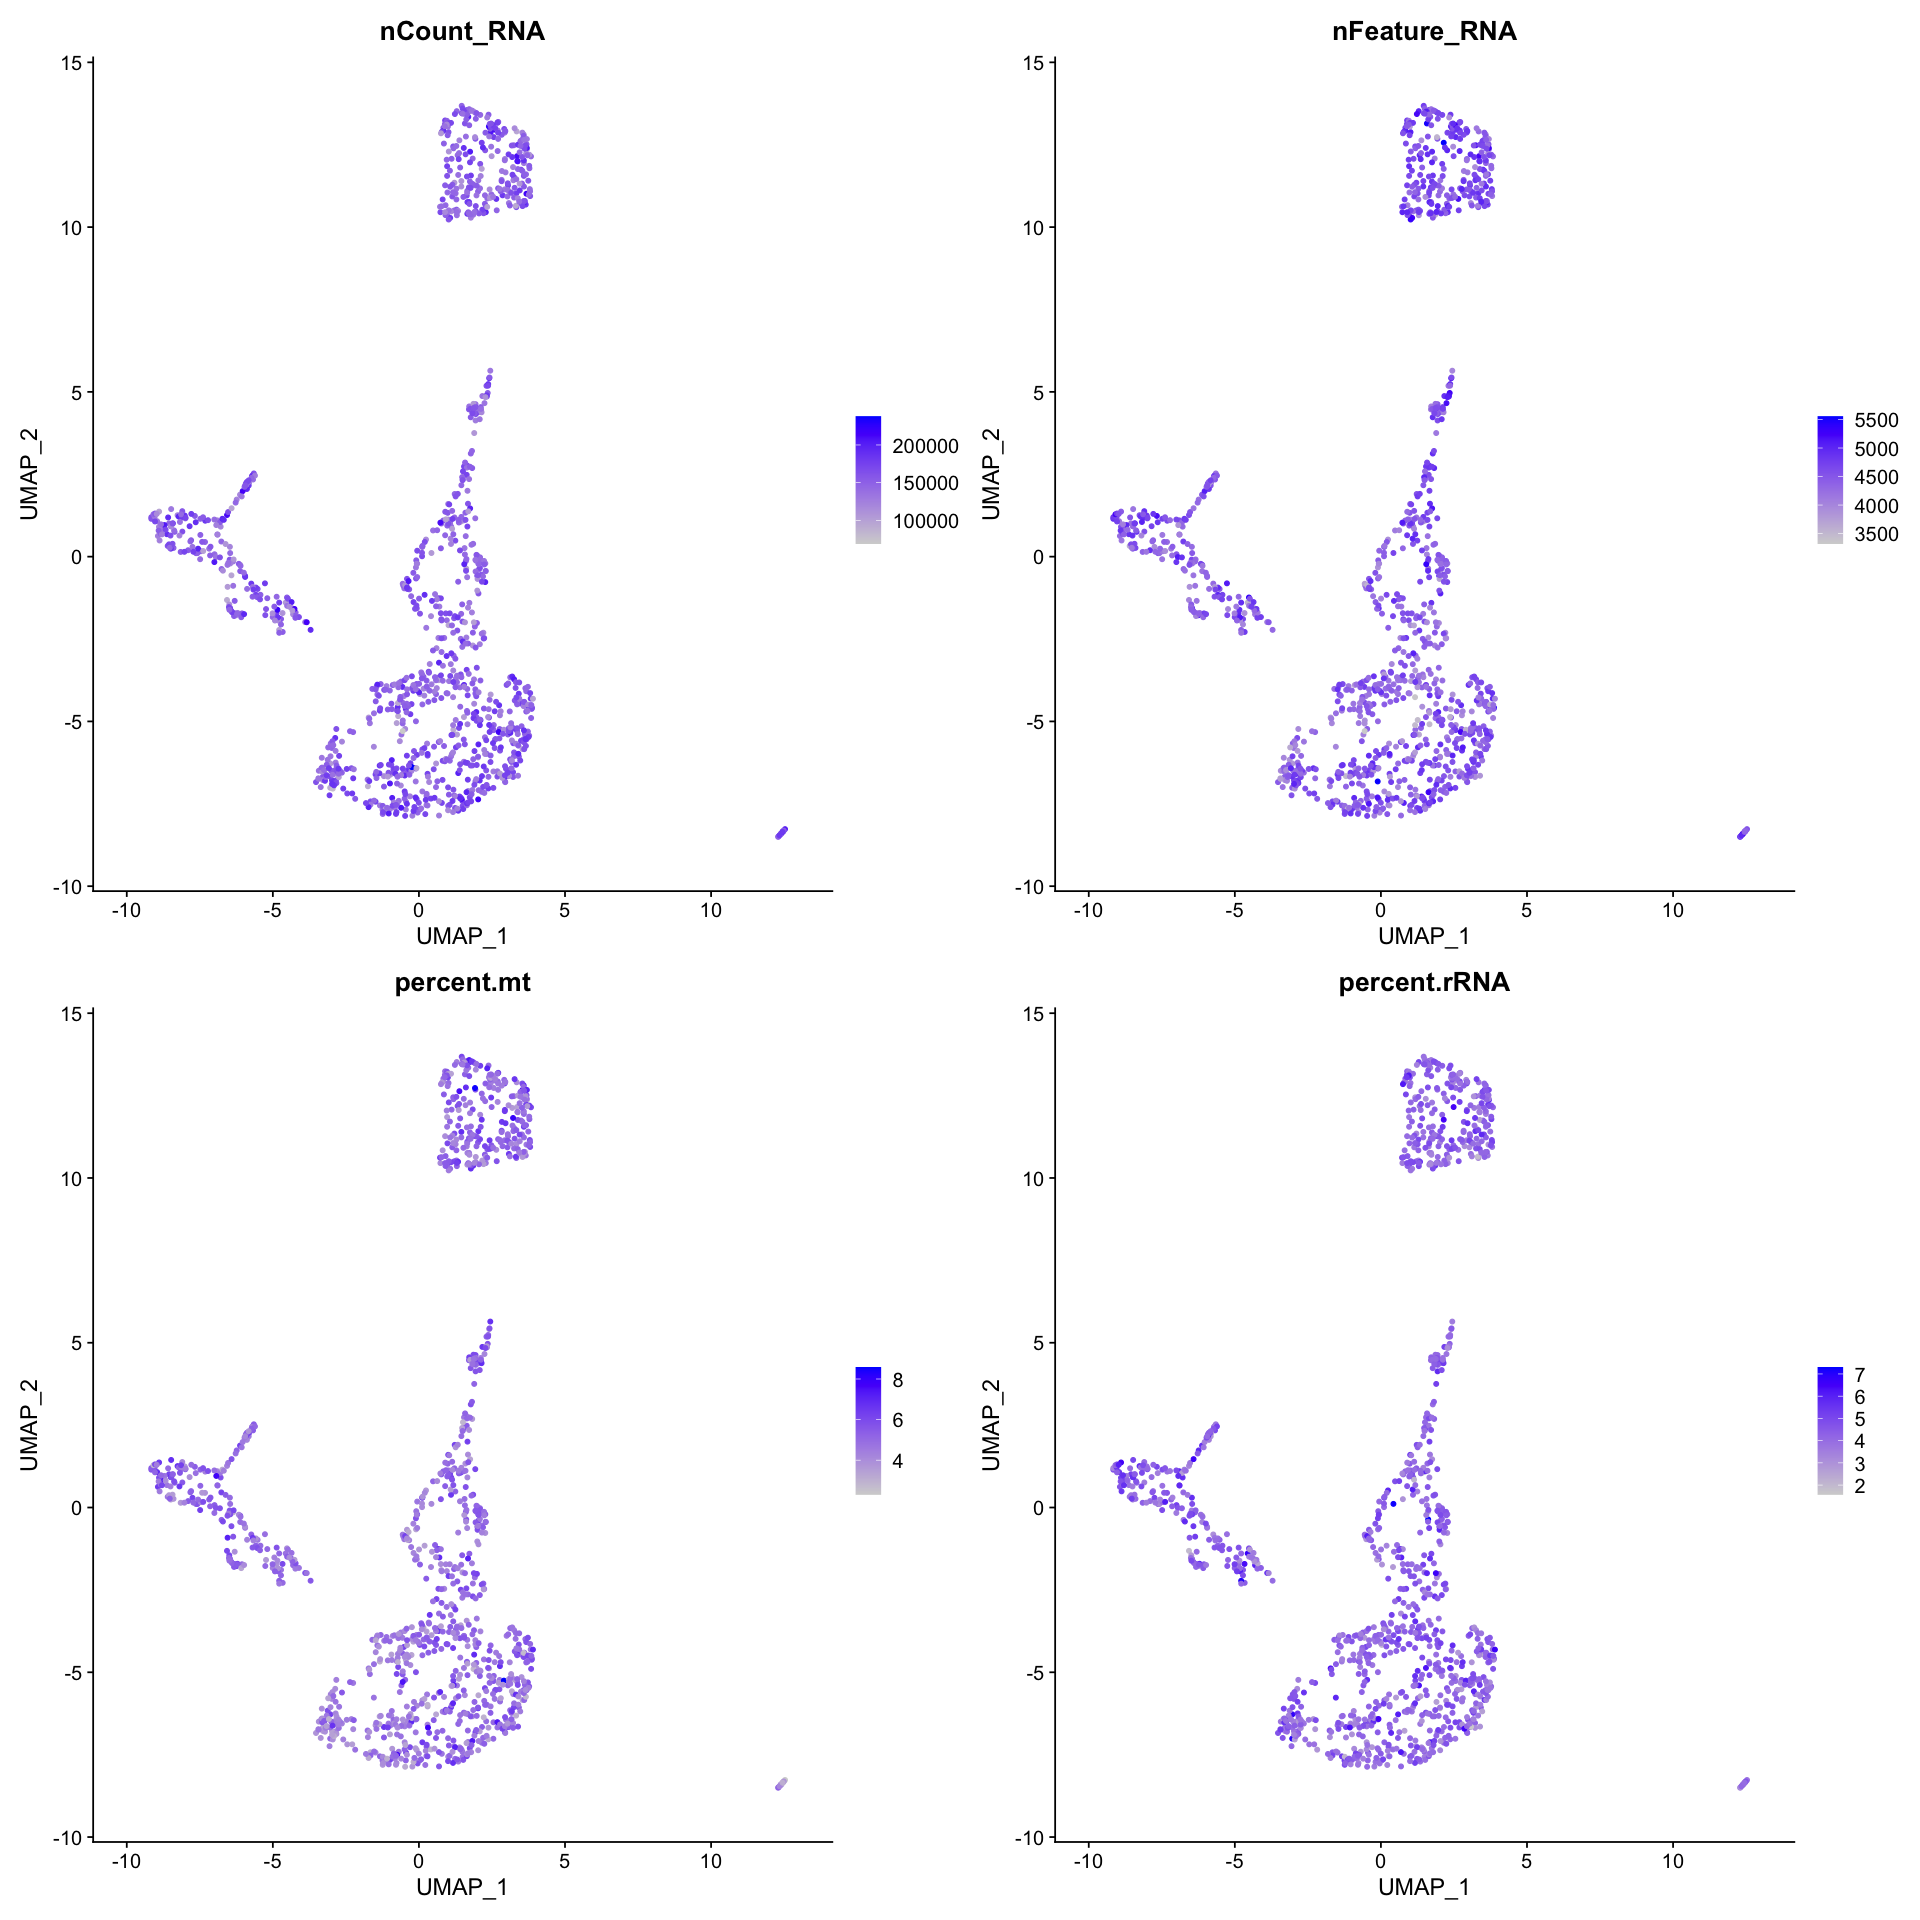

In [11]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu_HQC, reduction = "umap", features = c("nCount_RNA", "nFeature_RNA", 
                               "percent.mt", "percent.rRNA"), pt.size = 1,  ncol = 2)

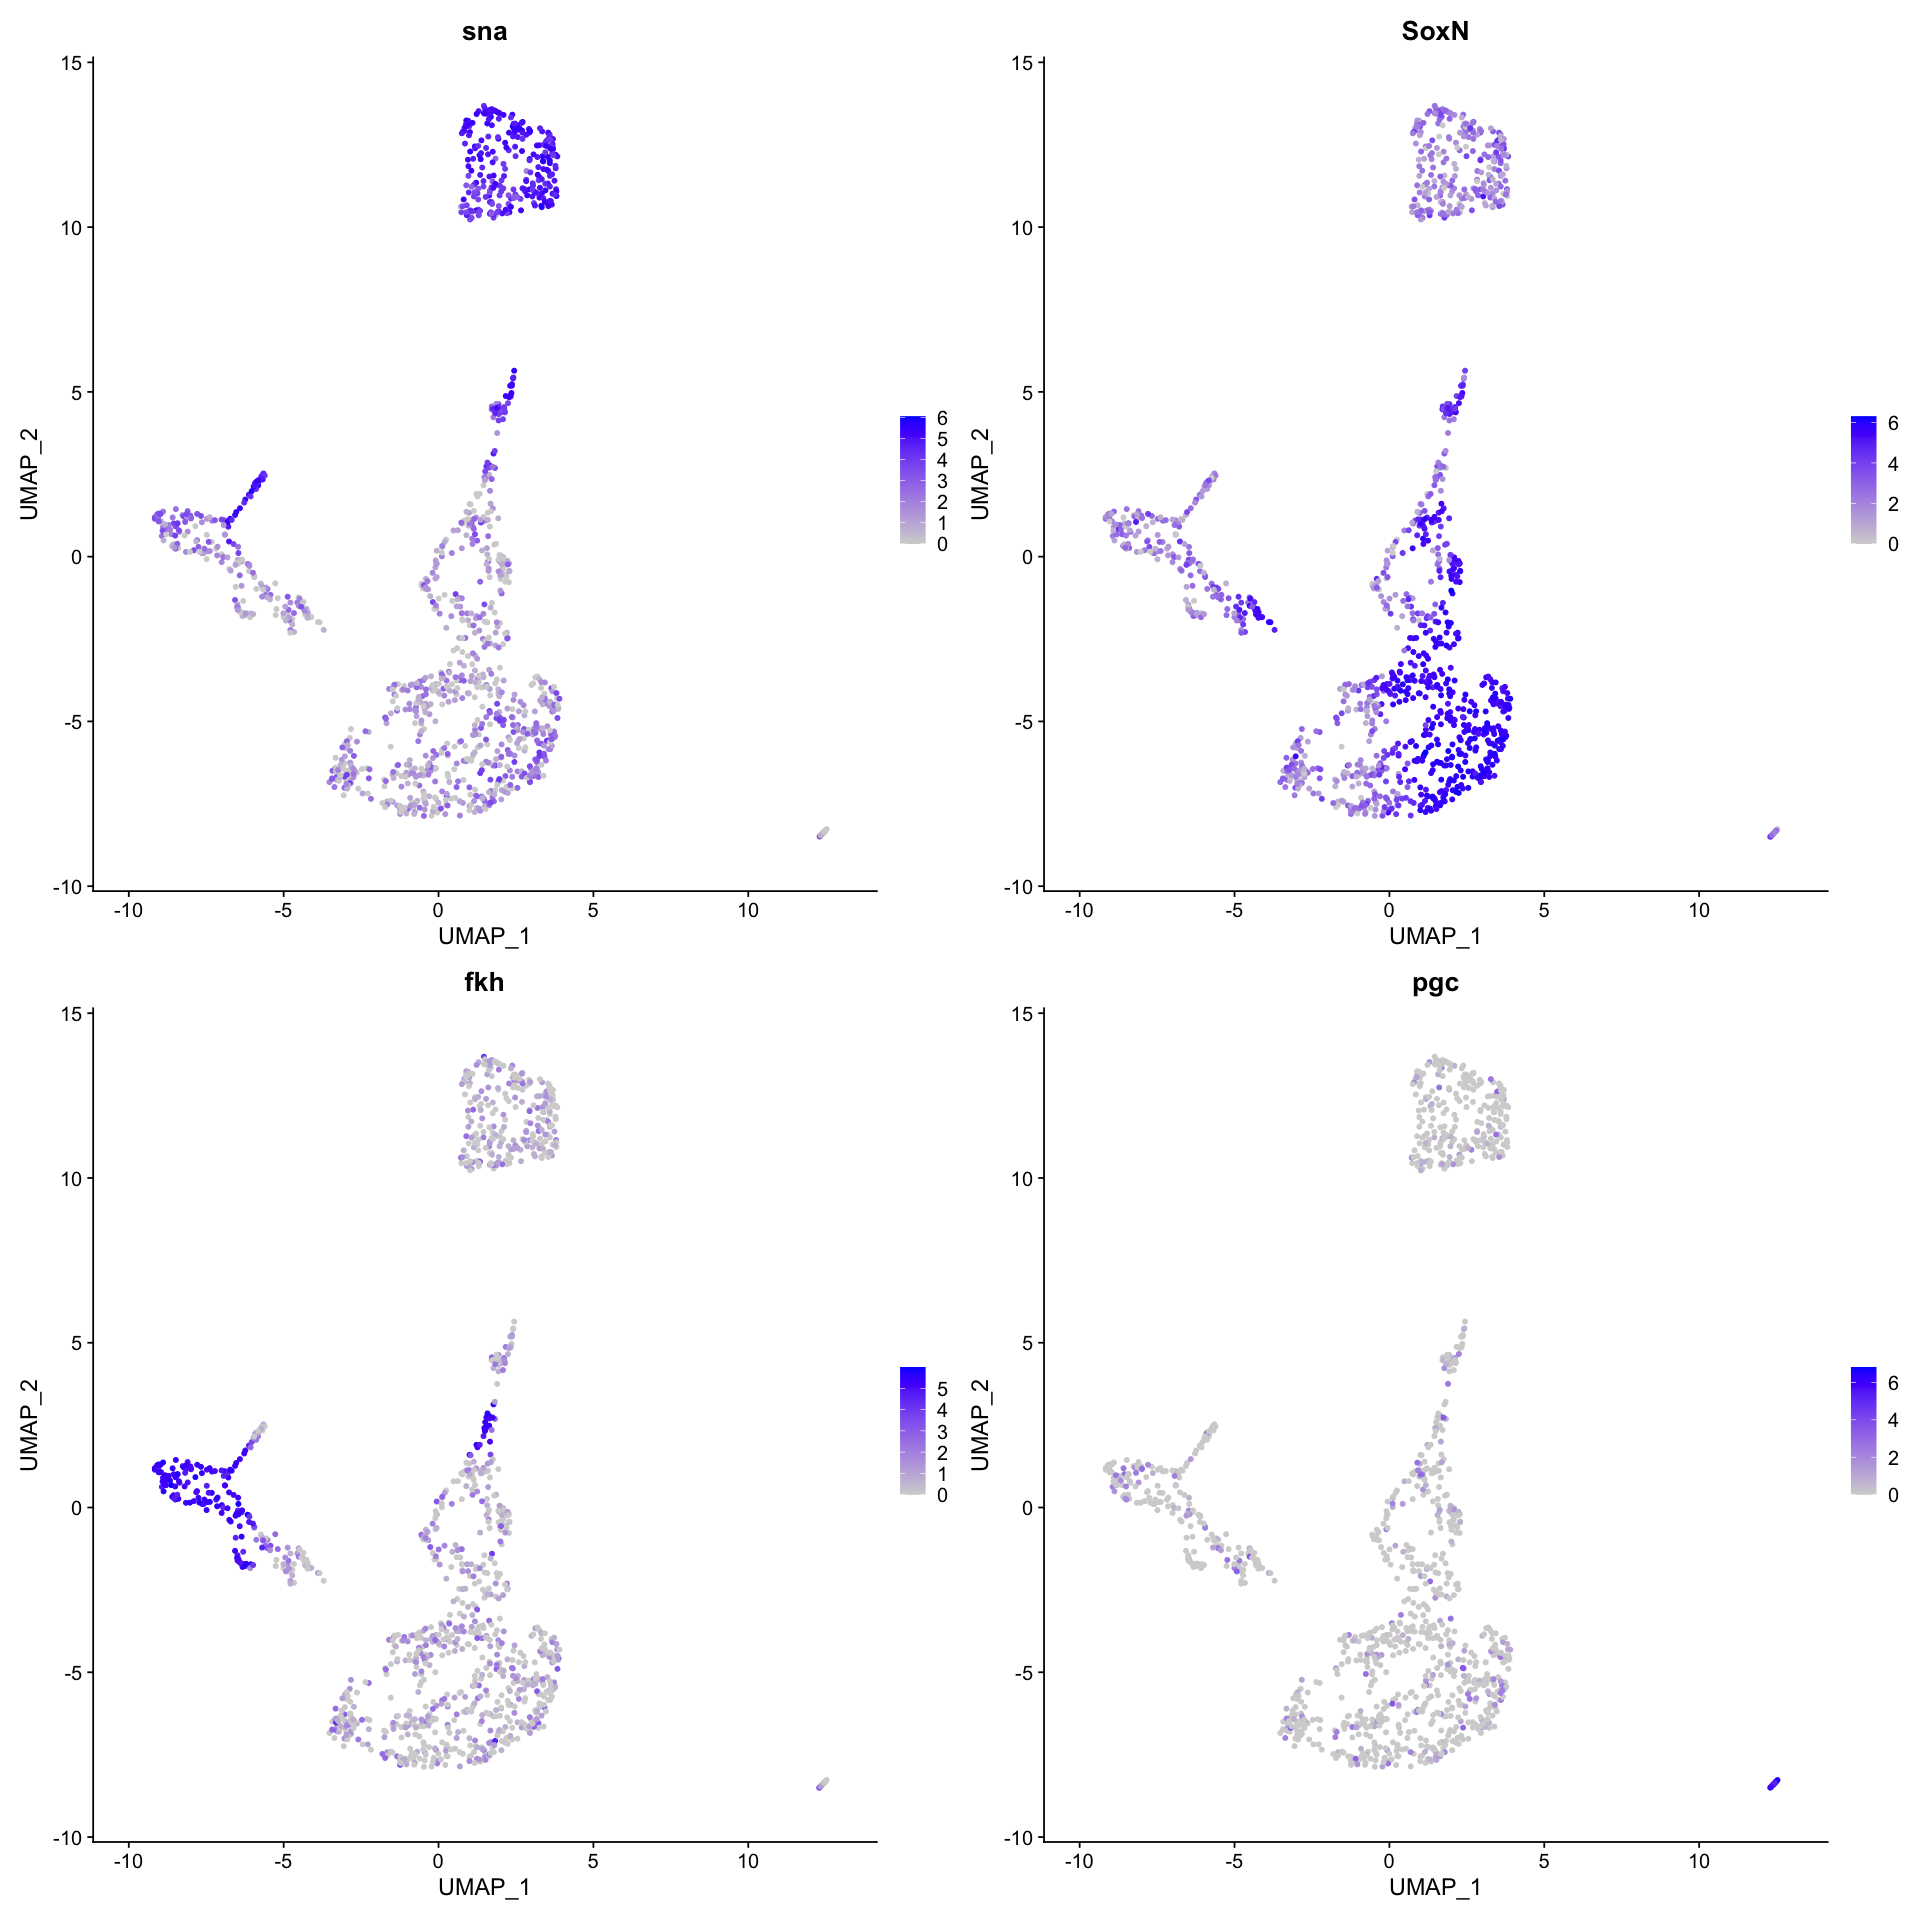

In [12]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu_HQC, reduction = "umap", features = c("sna","SoxN", "fkh", "pgc"), pt.size = 1,  ncol = 2)

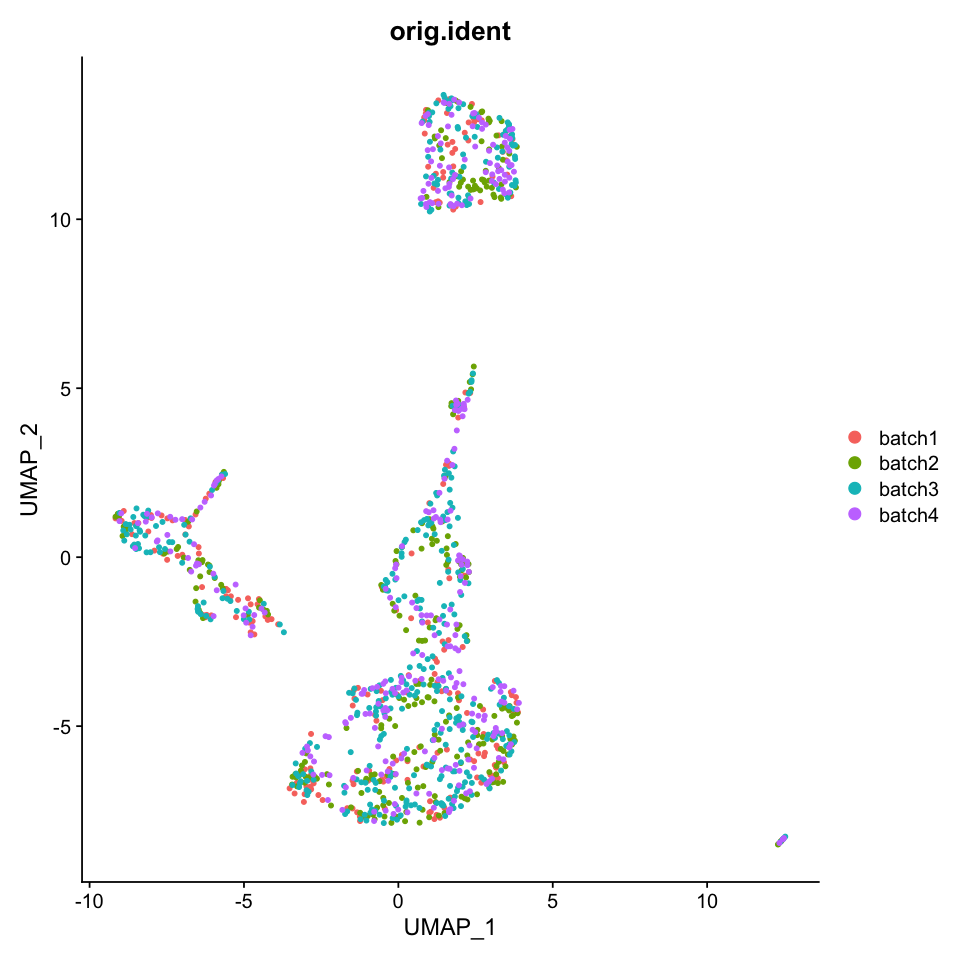

In [13]:
options(repr.plot.width=8, repr.plot.height=8)
DimPlot(seu_HQC, reduction =  "umap", group.by = "orig.ident", label = FALSE, pt.size = 1)

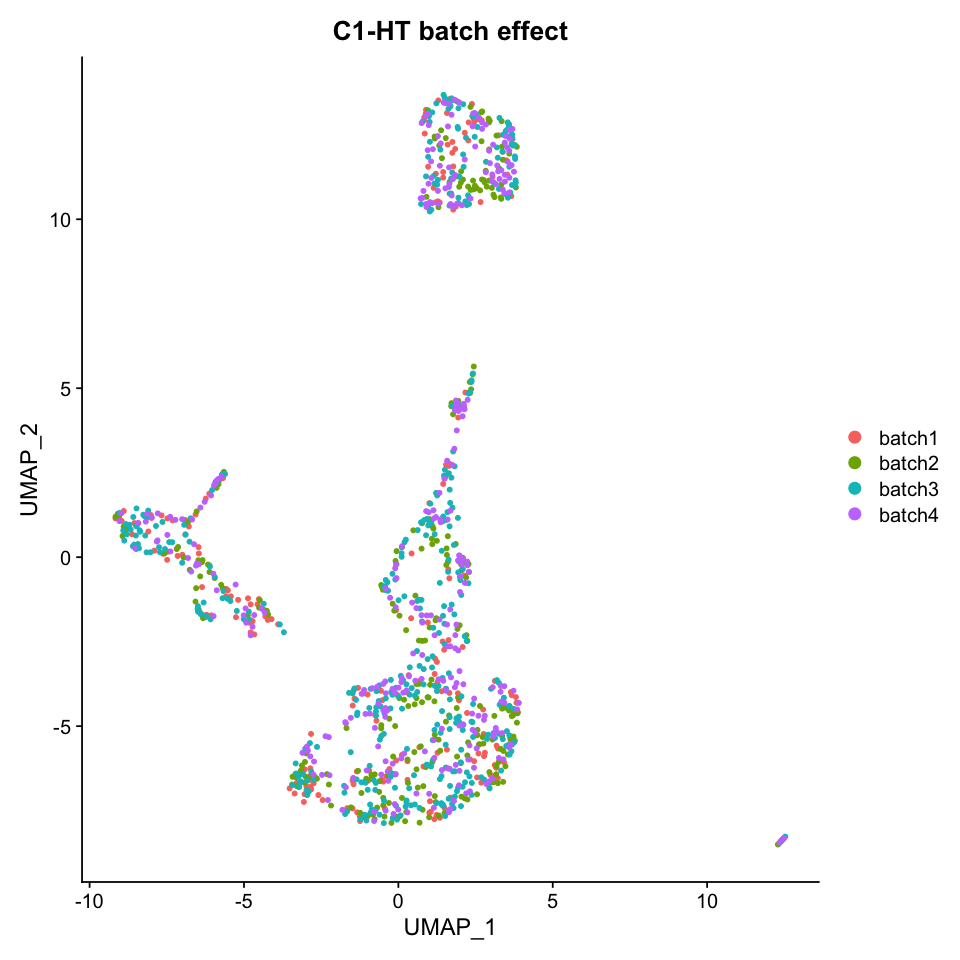

In [14]:
p <- DimPlot(seu_HQC, reduction =  "umap", group.by = "orig.ident", label = FALSE, pt.size = 1) +  
labs(title="C1-HT batch effect")

print(p)

ggsave(file = "./figures/01_Seurat_clustering_Set1/C1-HT_batch_effect_umap.eps", width = 10.24, height = 10.24, plot=p)

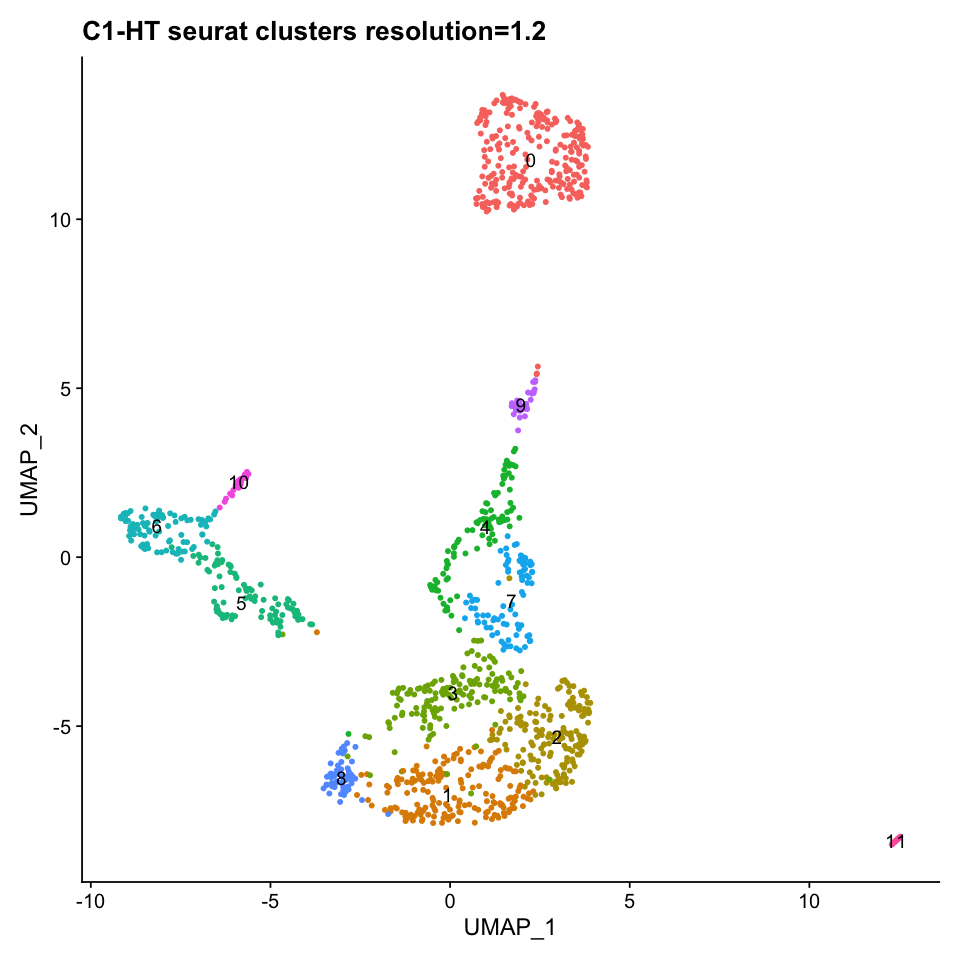

In [15]:
options(repr.plot.width=8, repr.plot.height=8)
p <- DimPlot(seu_HQC, reduction =  "umap", label = TRUE) + NoLegend() +  
labs(title="C1-HT seurat clusters resolution=1.2")

print(p)

ggsave(file = "./figures/01_Seurat_clustering_Set1/C1-HT_seurat_clusters_umap.eps", width = 10.24, height = 10.24, plot=p)

In [16]:
all.markers <- FindAllMarkers(object = seu_HQC, only.pos = TRUE)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11



In [17]:
nrow(all.markers)
all.markers.top10 <- all.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
nrow(all.markers.top10)

[1] 5253

[1] 120

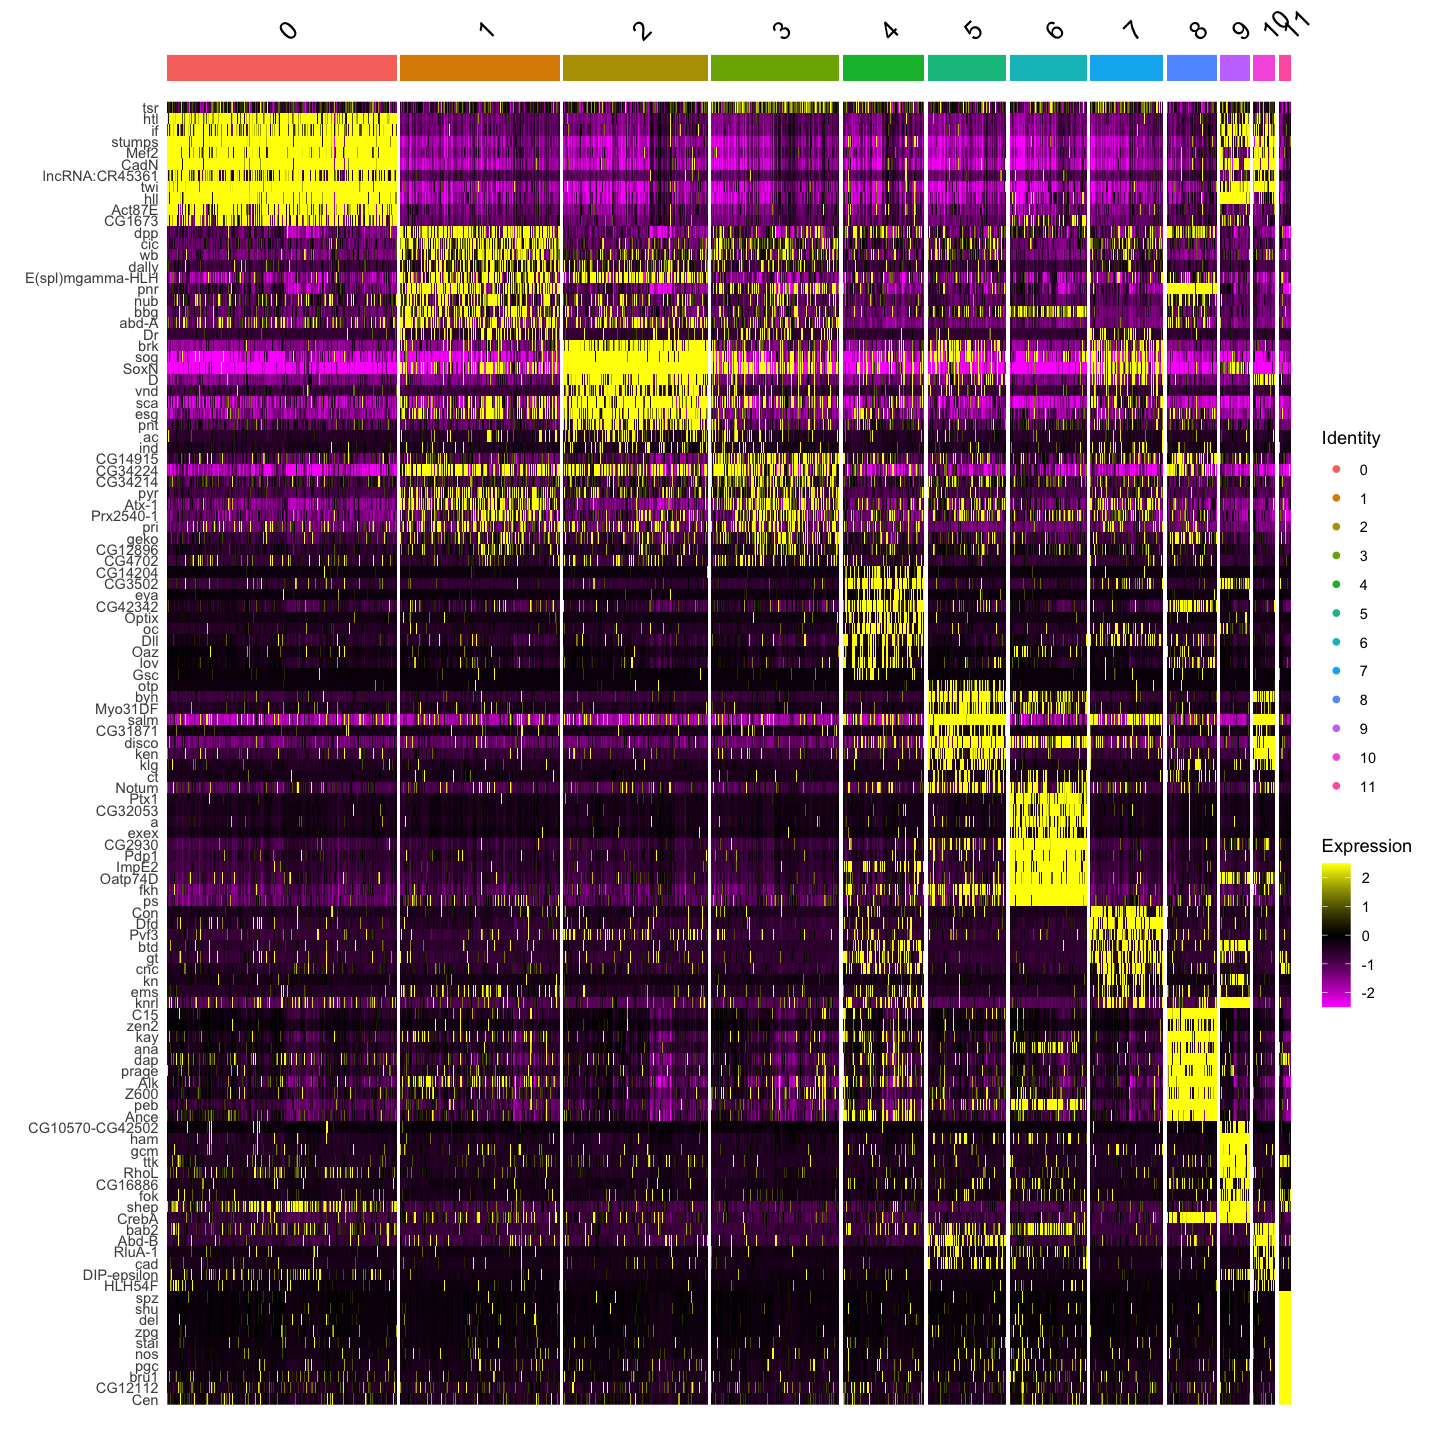

In [18]:
options(repr.plot.width=12, repr.plot.height=12)
DoHeatmap(seu_HQC, features = c("tsr", all.markers.top10$gene))

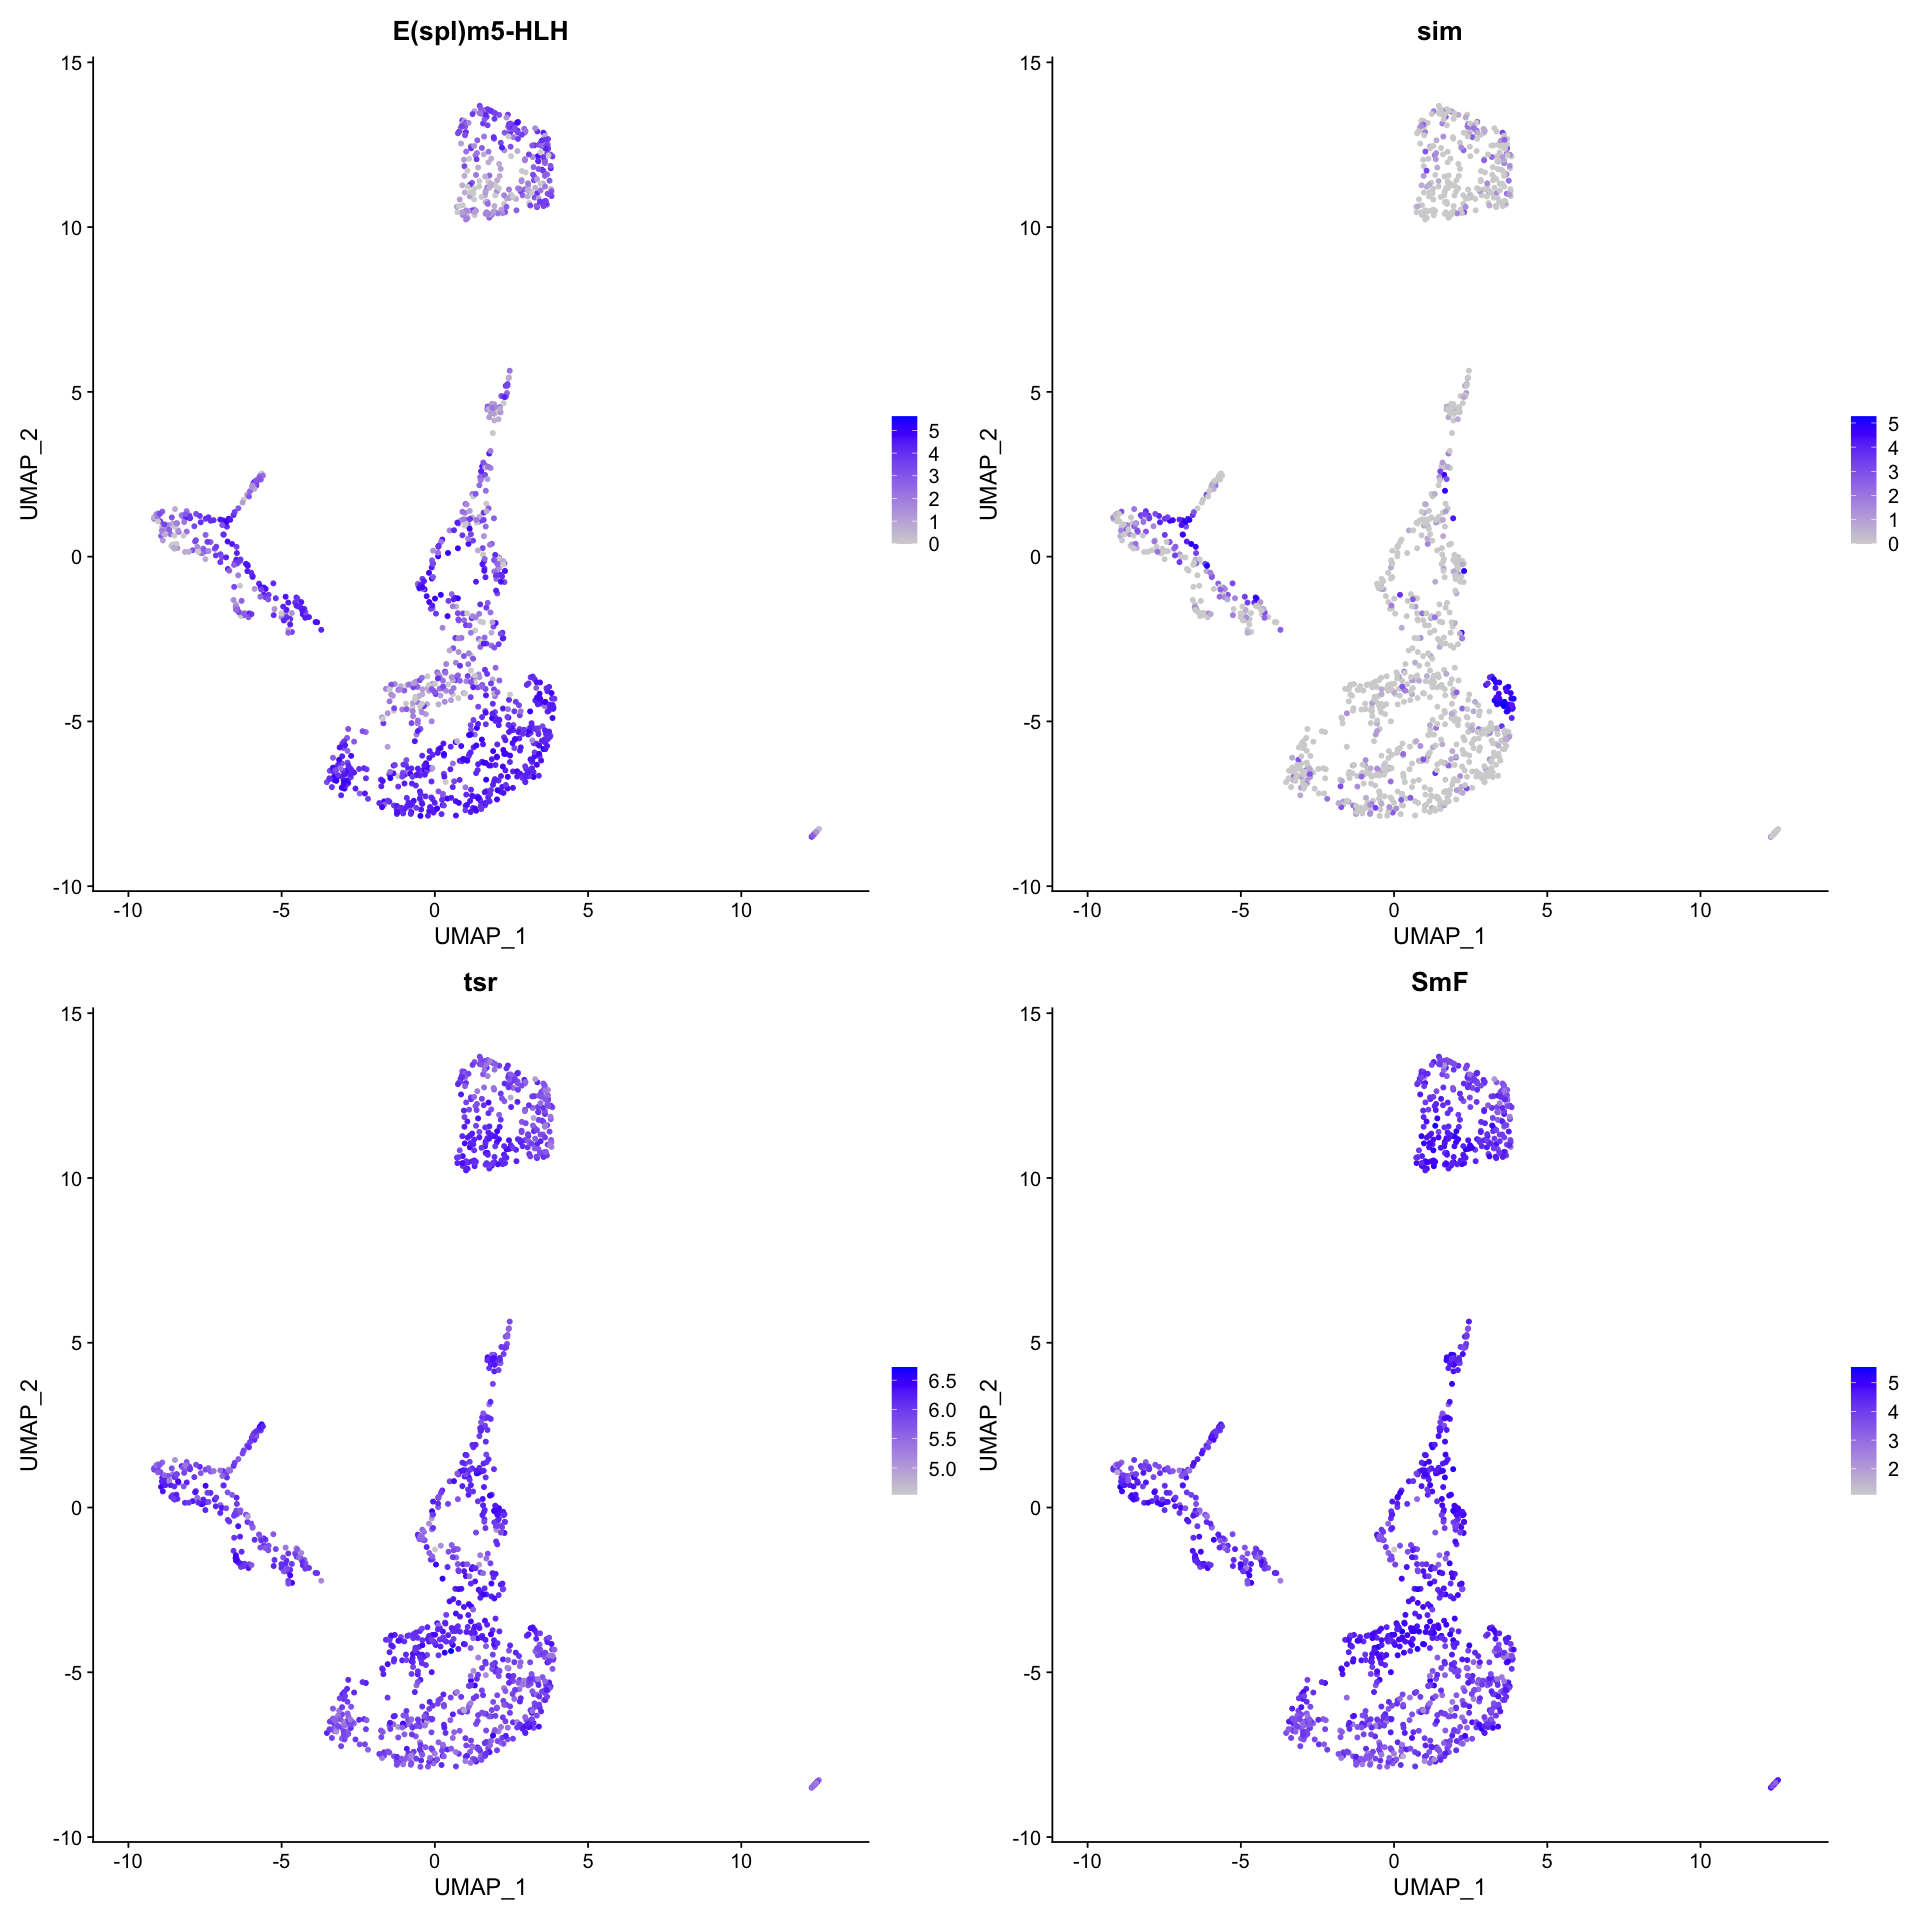

In [19]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu_HQC, reduction = "umap", features = c("E(spl)m5-HLH", "sim", "tsr", "SmF"), pt.size = 1,  ncol = 2)

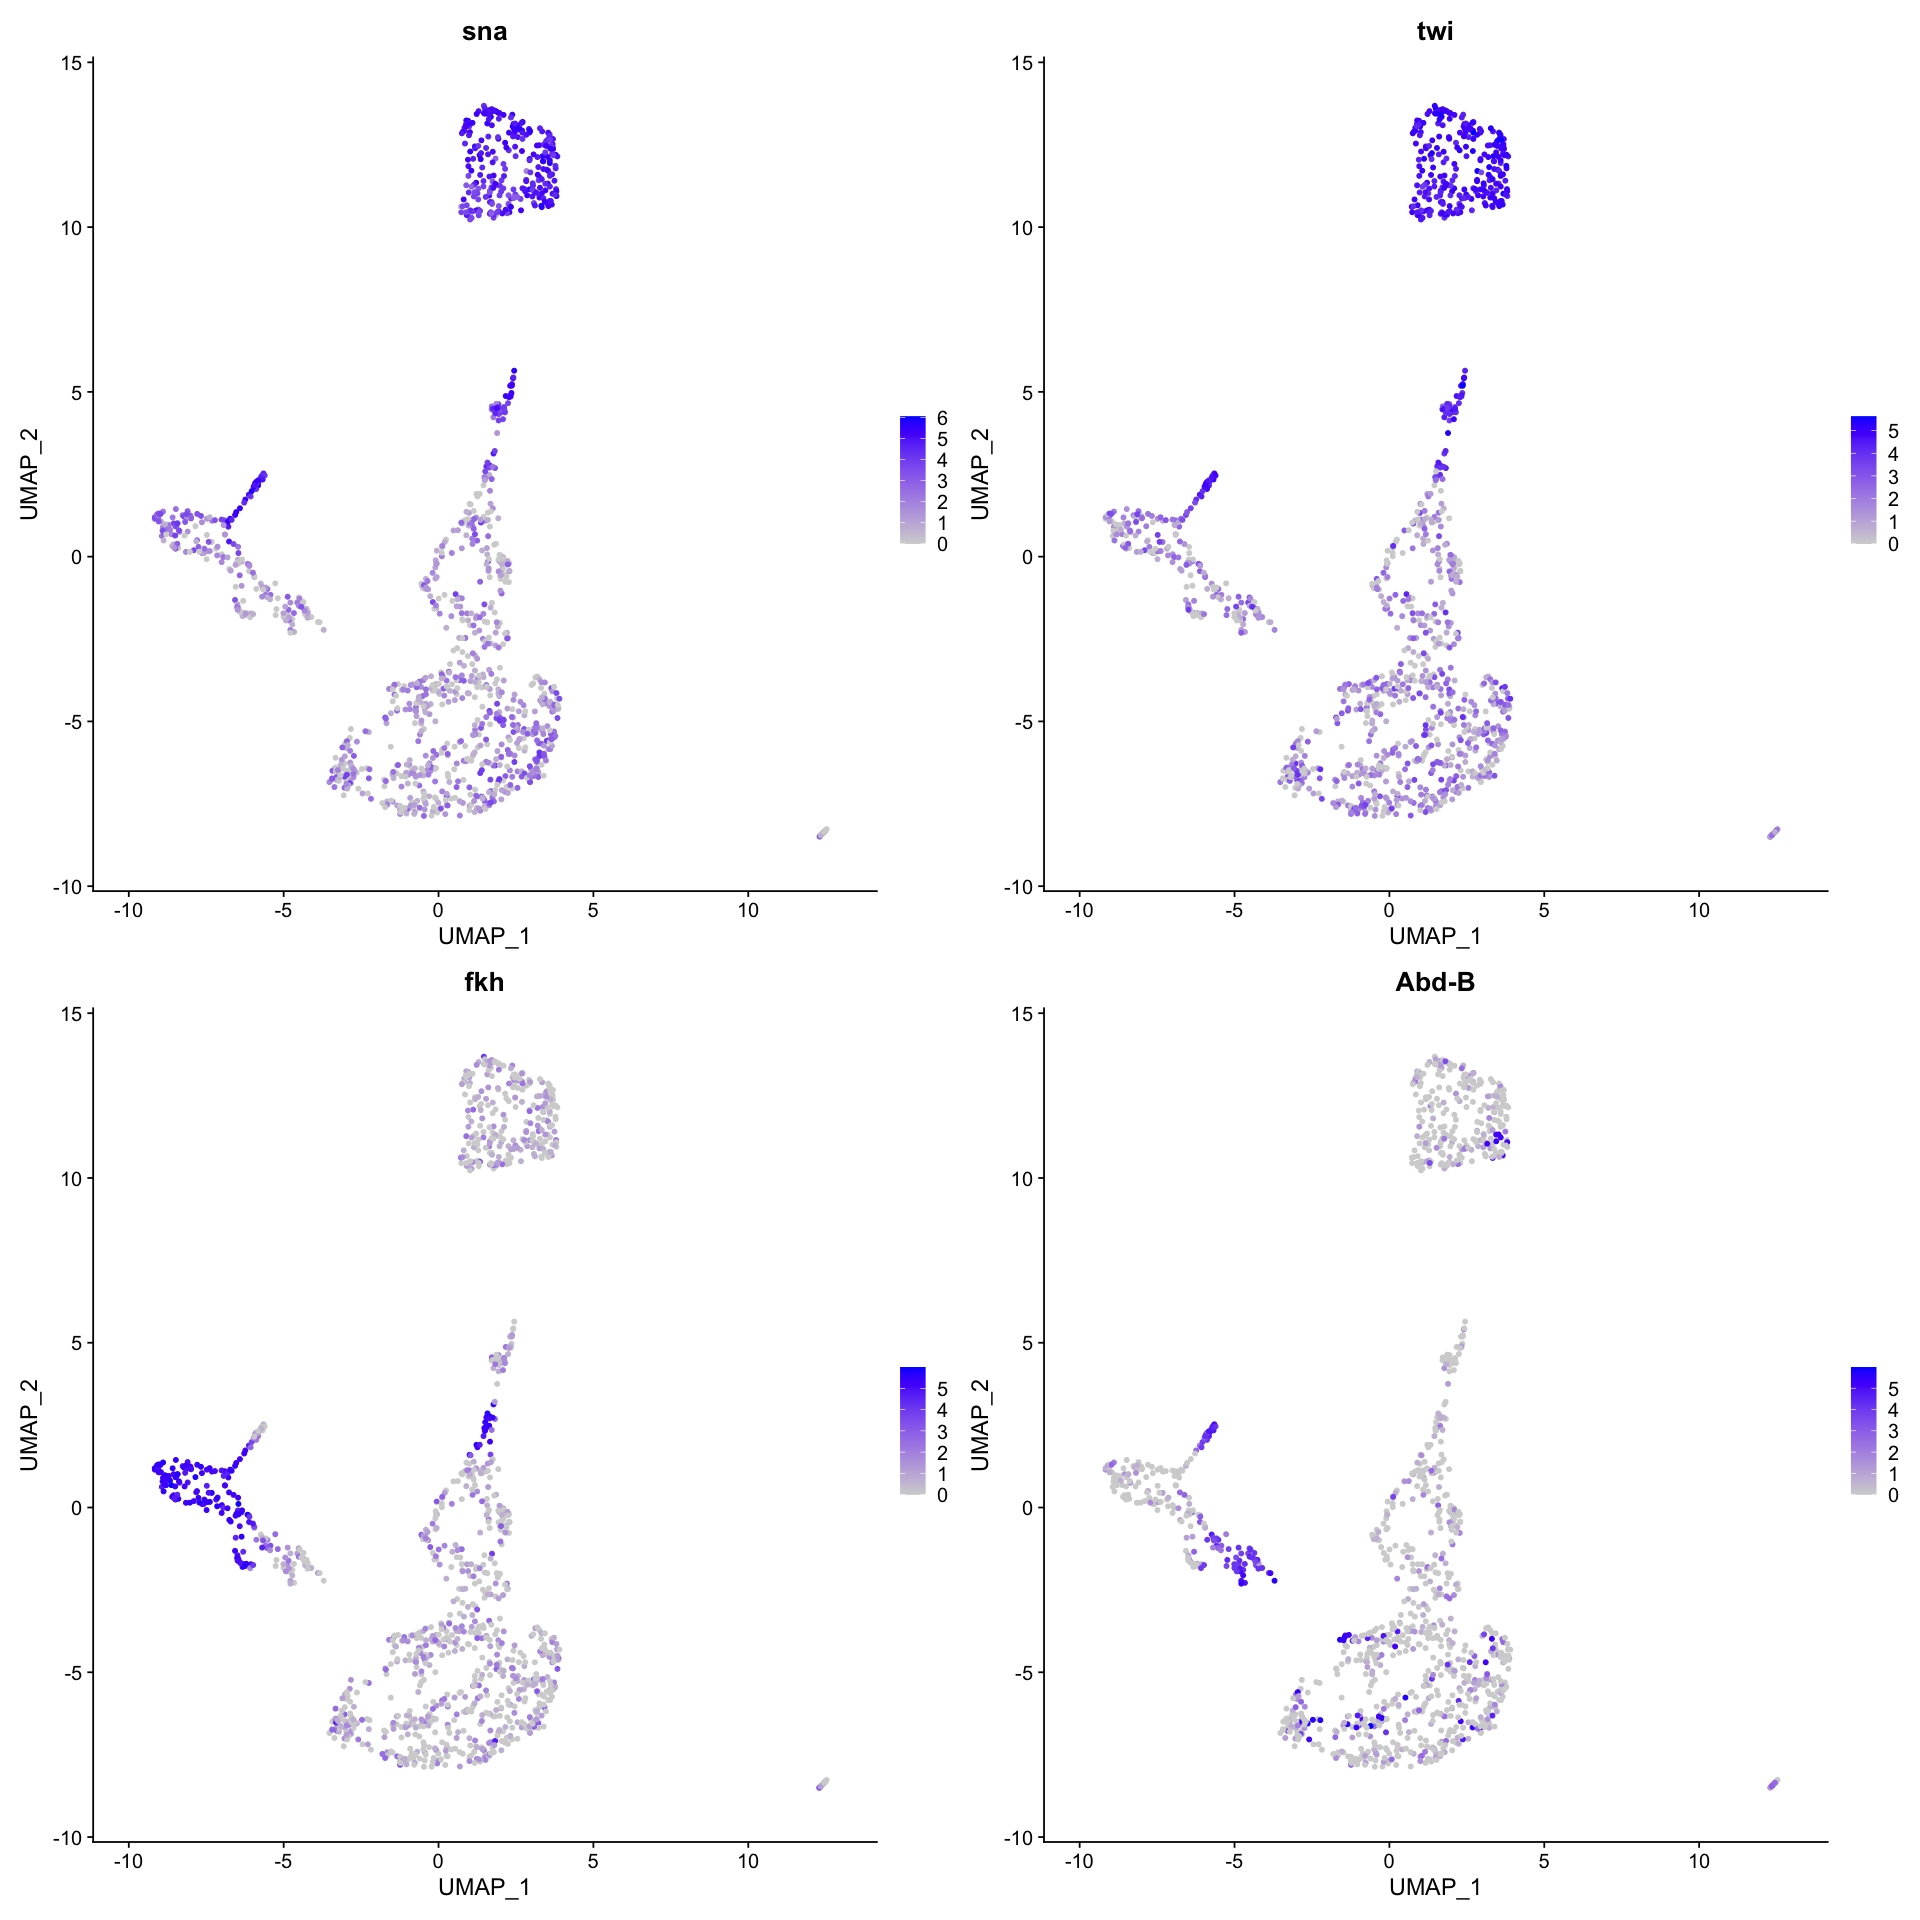

In [20]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu_HQC, reduction = "umap", features = c("sna", "twi", "fkh", "Abd-B"), pt.size = 1,  ncol = 2)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



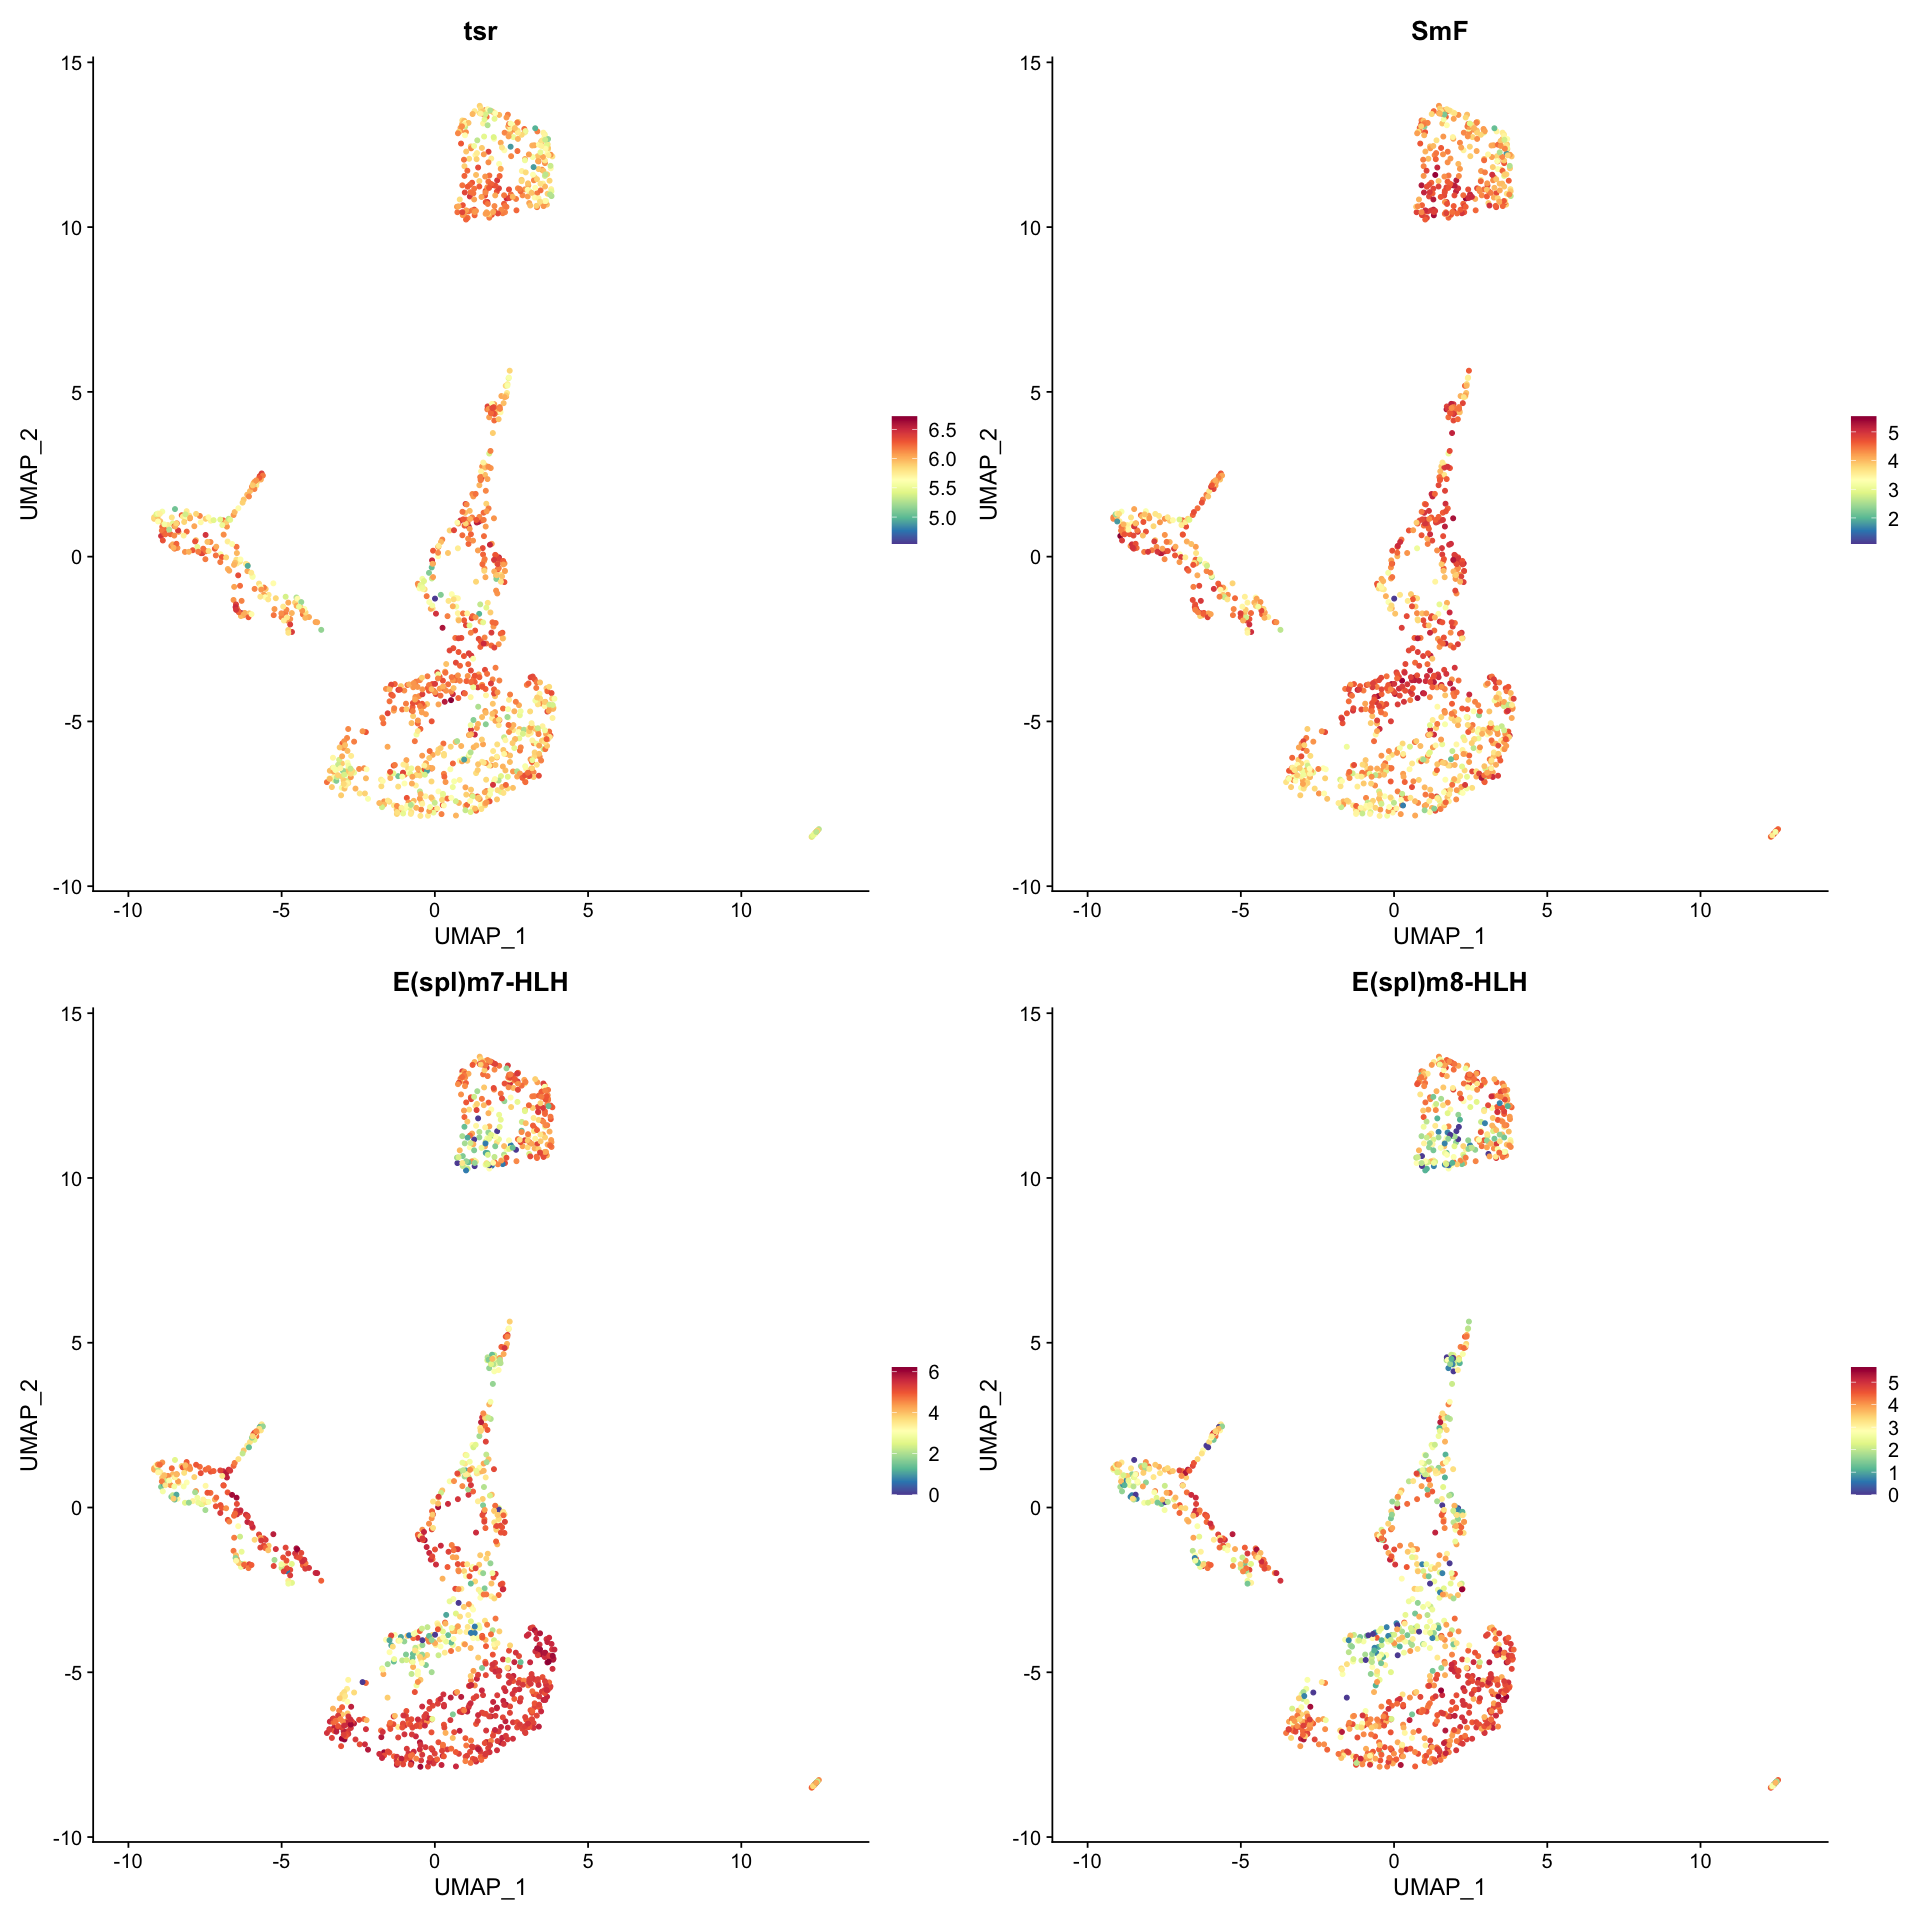

In [21]:
options(repr.plot.width=16, repr.plot.height=16)
FeaturePlot(seu_HQC, reduction = "umap", features = c("tsr", "SmF", "E(spl)m7-HLH", "E(spl)m8-HLH"), pt.size = 1,  ncol = 2) & 
  scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "Spectral")))

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



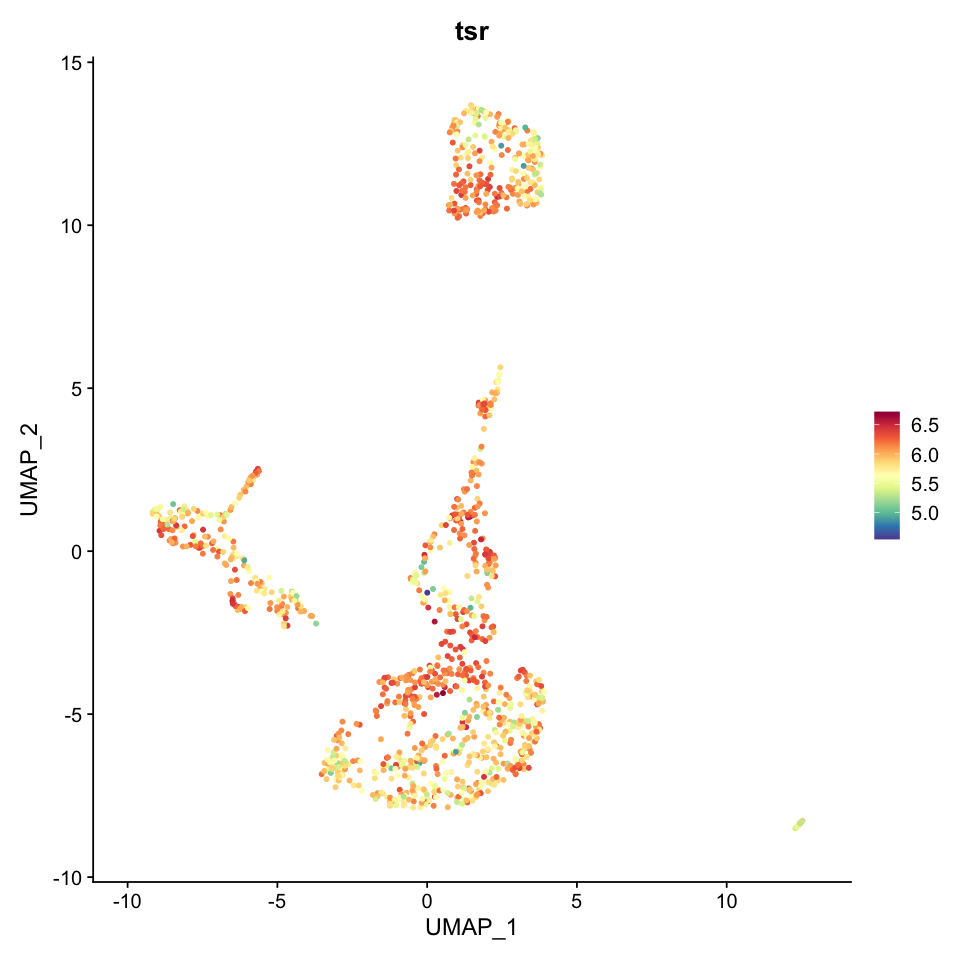

In [22]:
options(repr.plot.width=8, repr.plot.height=8)
p <- FeaturePlot(seu_HQC, reduction = "umap", features = c("tsr"), pt.size = 1,  ncol = 1) & 
  scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "Spectral")))

print(p)

ggsave(file = "./figures/01_Seurat_clustering_Set1/C1-HT_tsr_umap.eps", width = 10.24, height = 10.24, plot=p)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



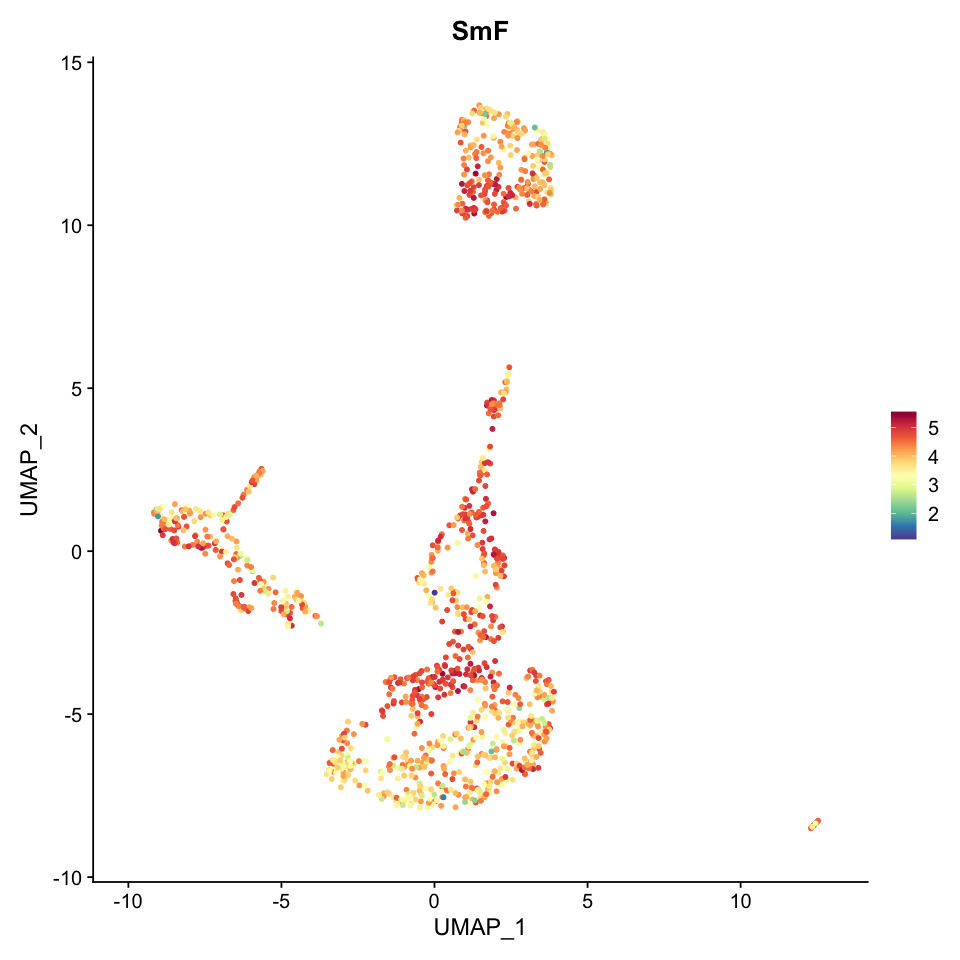

In [23]:
options(repr.plot.width=8, repr.plot.height=8)
p <- FeaturePlot(seu_HQC, reduction = "umap", features = c("SmF"), pt.size = 1,  ncol = 1) & 
  scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "Spectral")))

print(p)

ggsave(file = "./figures/01_Seurat_clustering_Set1/C1-HT_SmF_umap.eps", width = 10.24, height = 10.24, plot=p)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



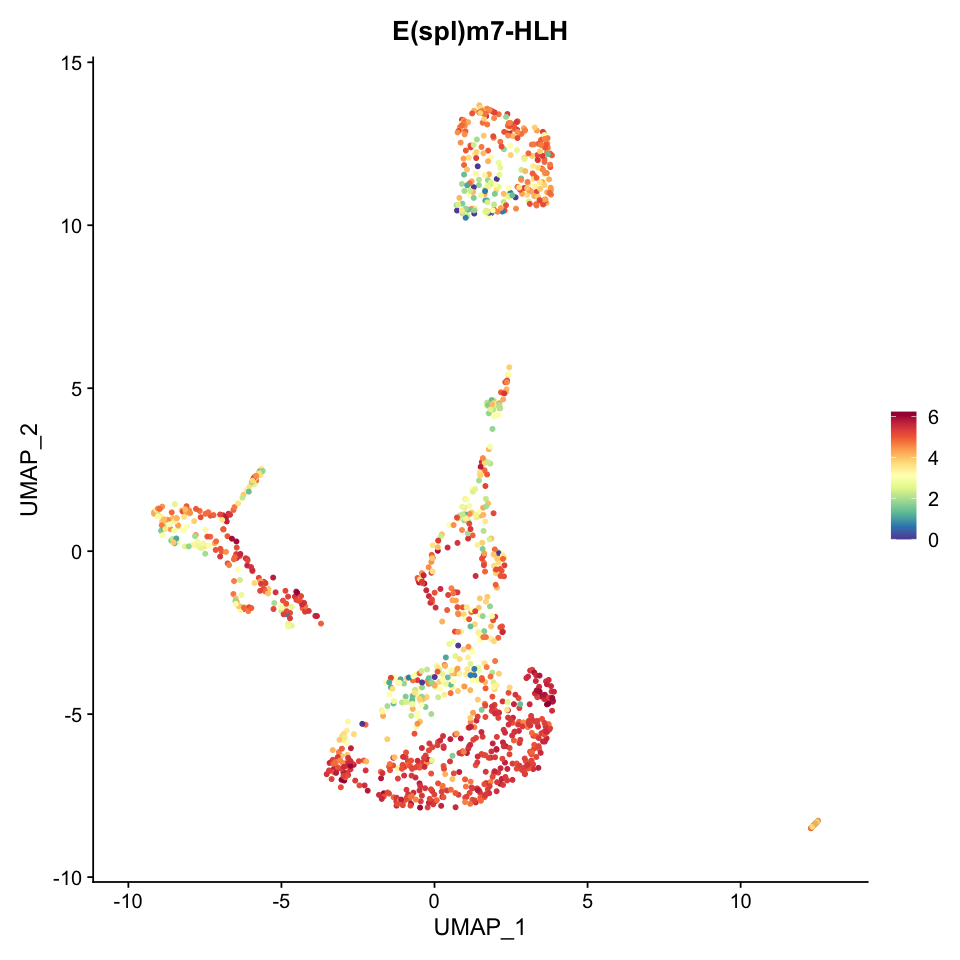

In [24]:
options(repr.plot.width=8, repr.plot.height=8)
p <- FeaturePlot(seu_HQC, reduction = "umap", features = c("E(spl)m7-HLH"), pt.size = 1,  ncol = 1) & 
  scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "Spectral")))

print(p)

ggsave(file = "./figures/01_Seurat_clustering_Set1/C1-HT_E(spl)m7-HLH_umap.eps", width = 10.24, height = 10.24, plot=p)

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



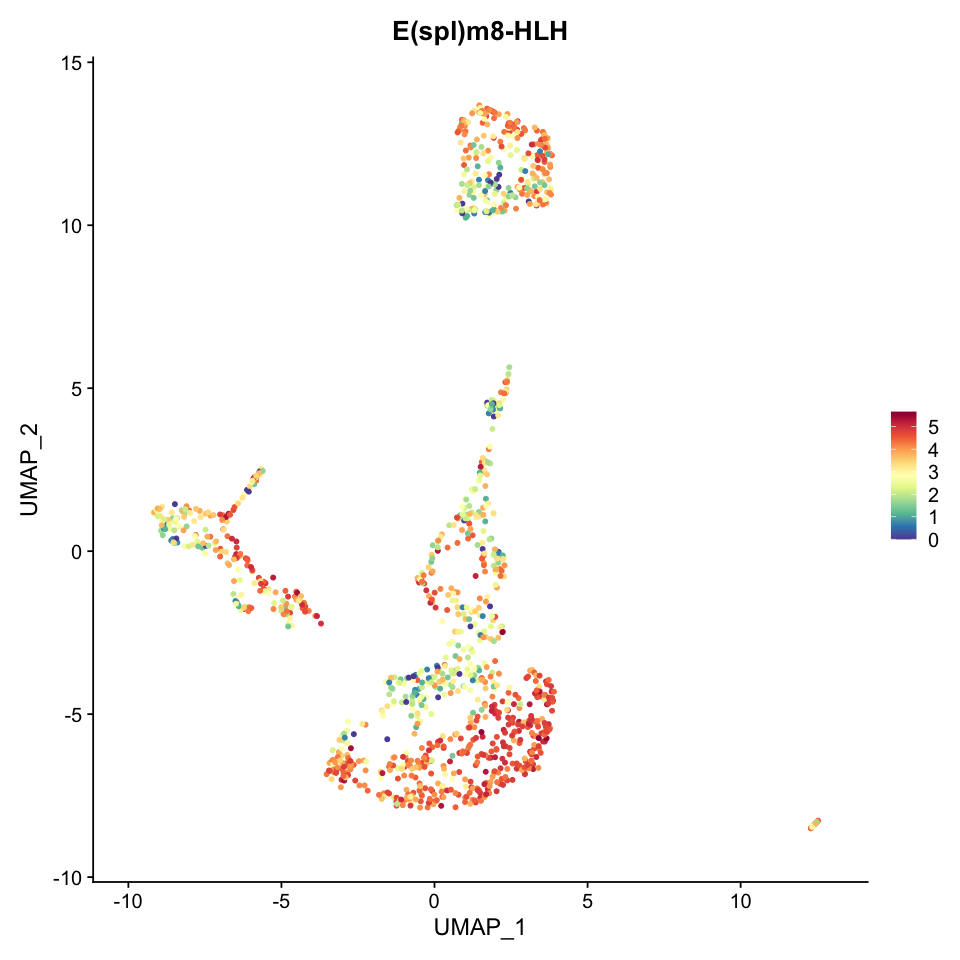

In [25]:
options(repr.plot.width=8, repr.plot.height=8)
p <- FeaturePlot(seu_HQC, reduction = "umap", features = c("E(spl)m8-HLH"), pt.size = 1,  ncol = 1) & 
  scale_colour_gradientn(colours = rev(brewer.pal(n = 11, name = "Spectral")))

print(p)

ggsave(file = "./figures/01_Seurat_clustering_Set1/C1-HT_E(spl)m8-HLH_umap.eps", width = 10.24, height = 10.24, plot=p)

In [26]:
write.table(all.markers, file="./seurat_cluseter_all_markers.txt",sep="\t",col.names=T,row.names=T,quote=F)

In [27]:
manual_id <- as.data.frame(seu_HQC$seurat_clusters)
colnames(manual_id) <- c('manual_ID')
head(manual_id)

manual_id$manual_ID <- dplyr::recode(manual_id$manual_ID, 
                                        "0" = "Trunk_mesoderm",
                                        "1" = "Dorsal_ectoderm",
                                        "2" = "Neuroectoderm",
                                        "3" = "Ectoderm_tsr-high",
                                        "4" = "Head_ectoderm",
                                        "5" = "Ectoderm_PS14/Hindgut",
                                        "6" = "Posterior_midgut",
                                        "7" = "Ectoderm_Dfd",
                                        "8" = "Amnioserosa",
                                        "9" = "Anterior_mesoderm",
                                        "10" = "Posterior_mesoderm",
                                        "11" = "Pole_cells"
                                     )
head(manual_id)

manual_ID
batch1_col1CATCTG 5        
batch1_col1CGTCAT 3        
batch1_col1CTAGTC 3        
batch1_col1GACTCA 1        
batch1_col1GCTGAT 5        
batch1_col1GTCTAC 4

manual_ID            
batch1_col1CATCTG Ectoderm_PS14/Hindgut
batch1_col1CGTCAT Ectoderm_tsr-high    
batch1_col1CTAGTC Ectoderm_tsr-high    
batch1_col1GACTCA Dorsal_ectoderm      
batch1_col1GCTGAT Ectoderm_PS14/Hindgut
batch1_col1GTCTAC Head_ectoderm

In [28]:
seu_HQC$annotated_seurat_clusters <- manual_id$manual_ID

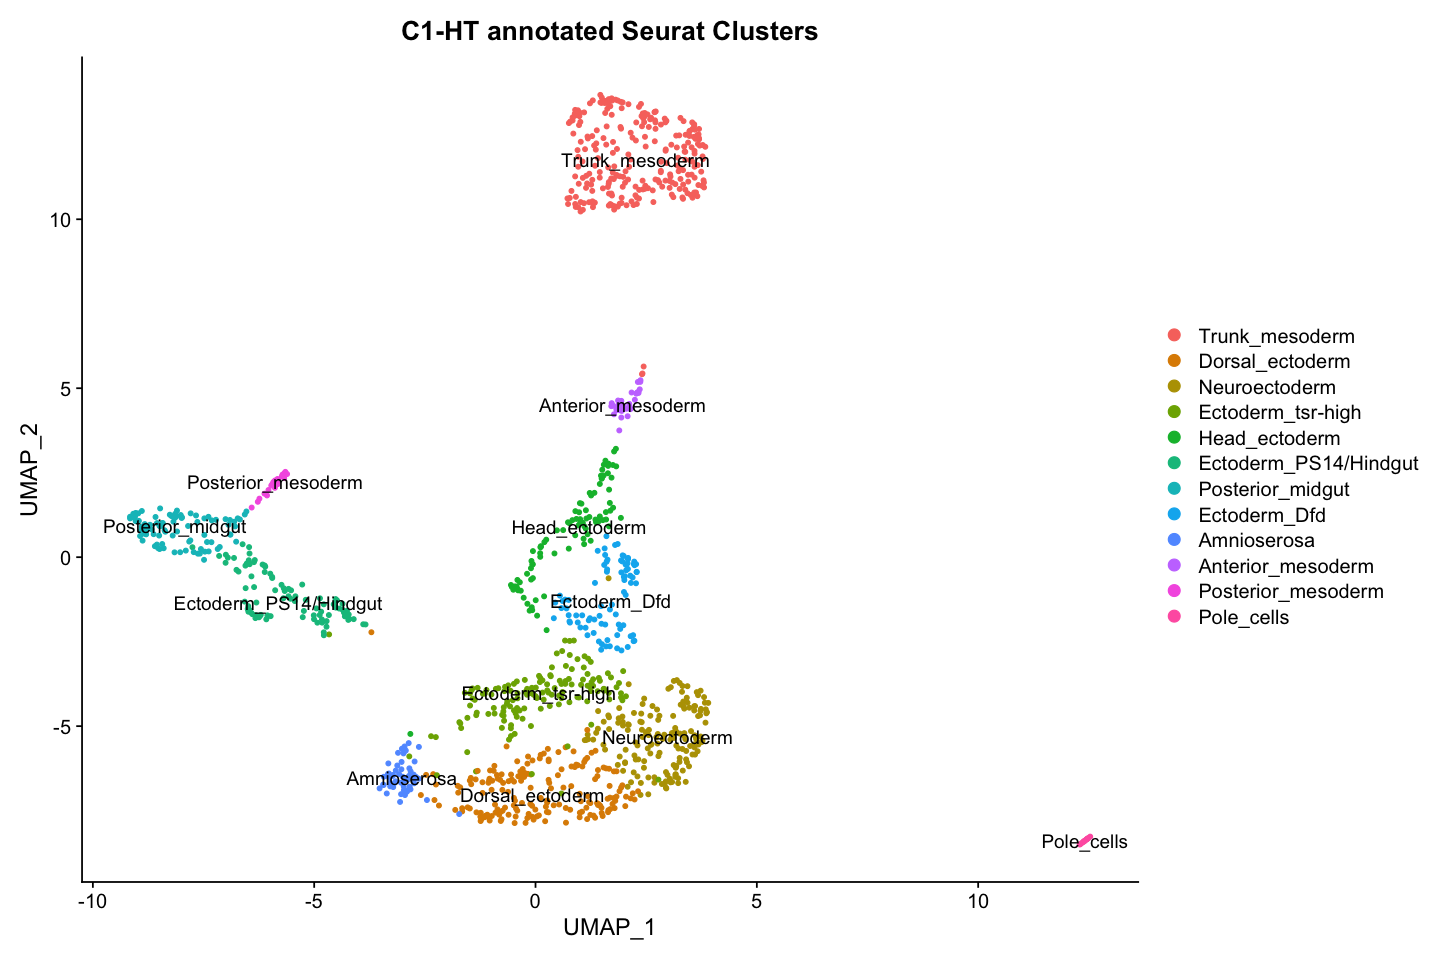

In [29]:
options(repr.plot.width=12, repr.plot.height=8)

p <- DimPlot(seu_HQC, reduction =  "umap", group.by = "annotated_seurat_clusters", label = TRUE, pt.size = 1) +  
labs(title="C1-HT annotated Seurat Clusters")

print(p)

ggsave(file = "./figures/01_Seurat_clustering_Set1/C1-HT_annotated_seurat_clusters_umap.eps", width = 10.24, height = 10.24, plot=p)

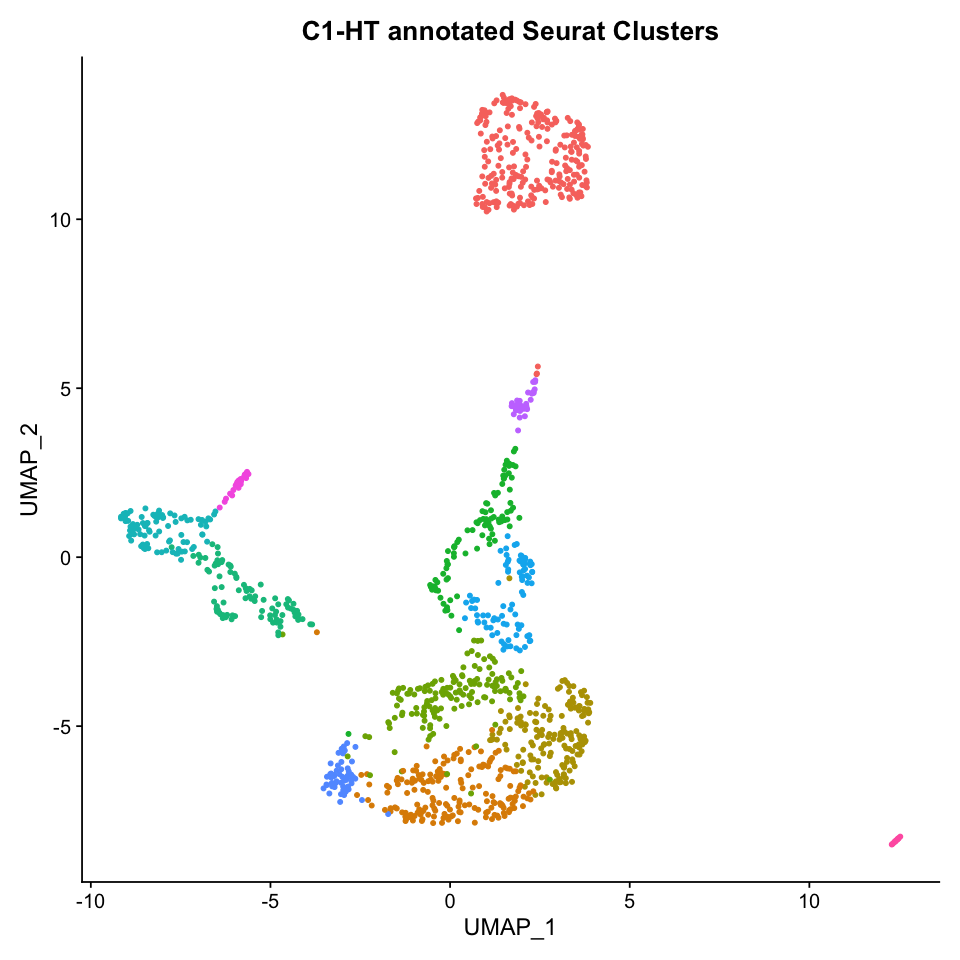

In [30]:
options(repr.plot.width=8, repr.plot.height=8)
p <- DimPlot(seu_HQC, reduction =  "umap", group.by = "annotated_seurat_clusters", label = FALSE, pt.size = 1) +  NoLegend() +
labs(title="C1-HT annotated Seurat Clusters")

print(p)

ggsave(file = "./figures/01_Seurat_clustering_Set1/C1-HT_annotated_seurat_clusters_umap_NoLegend.eps", width = 10.24, height = 10.24, plot=p)

In [31]:
saveRDS(seu_HQC, file = "../../data/seurat_object/Set1/seu_HQC_Set1.obj")

In [32]:
levels <- read.table(file="./seurat_clusters_rename_levels_color_with_tsr_high.txt")
colors <- levels[,2]
levels <- levels[,1]
head(levels)
length(levels)
head(colors)

[1] "Head_ectoderm"         "Ectoderm_Dfd"          "Amnioserosa"          
[4] "Dorsal_ectoderm"       "Neuroectoderm"         "Ectoderm_PS14/Hindgut"

[1] 12

[1] "skyblue1"   "skyblue3"   "gray75"     "olivedrab2" "olivedrab4"
[6] "goldenrod1"

In [33]:
length(levels(seu_HQC))
levels(seu_HQC)
setdiff(seu_HQC$annotated_seurat_clusters, levels)

[1] 12

[1] "0"  "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11"

character(0)

In [34]:
Idents(seu_HQC) <- 'annotated_seurat_clusters'
levels(seu_HQC) <- levels

Saving 7 x 7 in image



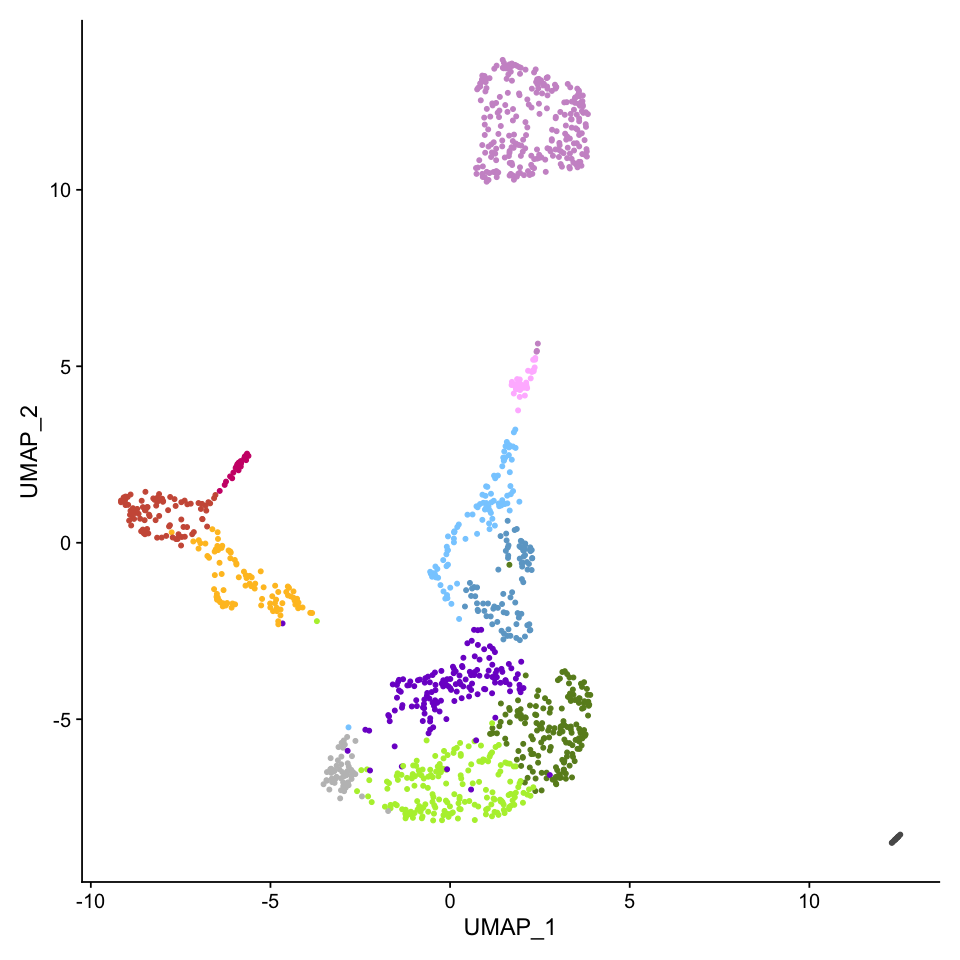

In [35]:
levels(seu_HQC) <- levels
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu_HQC, reduction =  "umap", label = FALSE, cols = colors) + NoLegend() 
fig
ggsave(fig, file = "./figures/01_Seurat_clustering_Set1/With_tsr_high_seurat_cluster_umap_Set1.eps", dpi = 300)

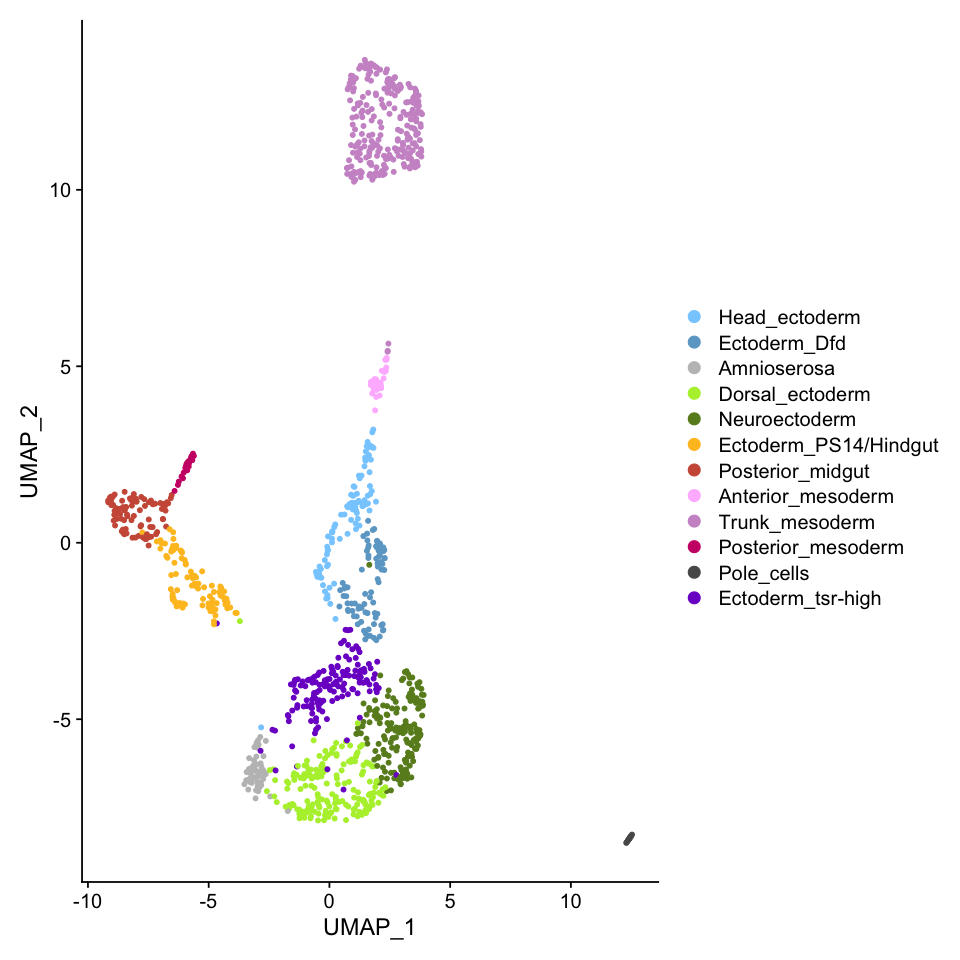

In [36]:
options(repr.plot.width=8, repr.plot.height=8)
fig <- DimPlot(seu_HQC, reduction =  "umap", label = FALSE, cols = colors)
fig
ggsave(fig, file = "./figures/01_Seurat_clustering_Set1/With_tsr_high_seurat_cluster_umap2_Set1.eps", dpi = 300, width = 12, height = 8)

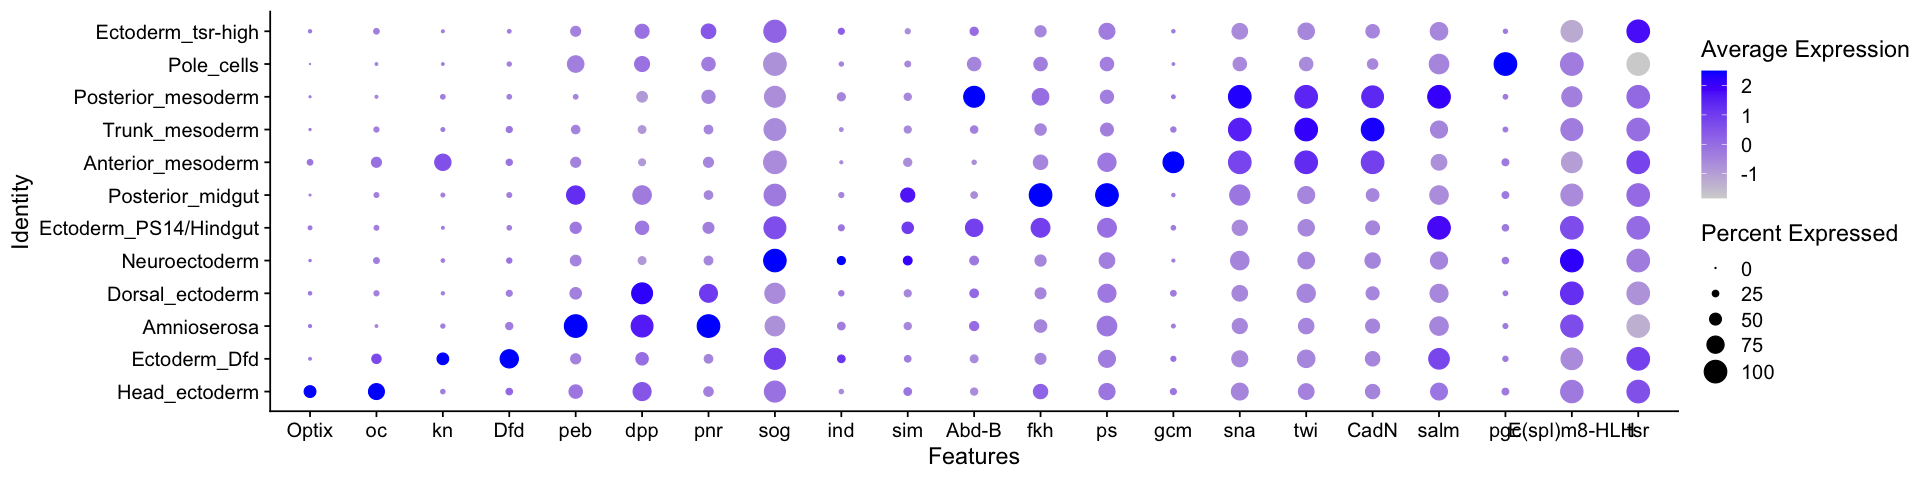

In [37]:
options(repr.plot.width=16, repr.plot.height=4)
fig <- DotPlot(object = seu_HQC, 
        features = c("Optix", "oc", "kn", "Dfd",  "peb","dpp", "pnr", "sog", "ind", "sim", "Abd-B", 
                     "fkh", "ps", "gcm", "sna", "twi", "CadN", "salm", "pgc", "E(spl)m8-HLH", "tsr"))
fig
ggsave(fig, file = "./figures/01_Seurat_clustering_Set1/With_tsr_high_seurat_cluster_DotPlot_Set1.eps", dpi = 300,  width = 16, height = 6)

In [38]:
path = './figures/gene_expressions_on_UMAP_with_tsr_high'
features <- c("sna", "twi","CadN",
              "SoxN","dpp",
              "fkh","hkb","srp",
              "sim","E(spl)m8-HLH","gcm", "byn", "ct", "disco",
              "sog", "vnd", "ind", "Dr","Atx-1", "tup", "grn", "Doc2", "zen","peb",
              "trn","eve","ftz","en","wg",
              "Optix", "oc", "kn","salm","Dfd","Scr", "Antp", "Ubx", "abd-A","Abd-B")
for (name in features){
    options(repr.plot.width=8, repr.plot.height=8)
    p <- FeaturePlot(seu_HQC, features = name) + theme(plot.title = element_blank())
    basename = paste(name, 'Set1_all_cells_with_tsr_high.eps',sep = '_')
    filename = paste(path, basename, sep = '/')
    ggsave(p, file = filename, width = 8, height = 8)
}

In [39]:
path = './figures/gene_expressions_on_UMAP_with_tsr_high'
features <- c("sna", "twi","CadN",
              "SoxN","dpp",
              "fkh","hkb","srp",
              "sim","E(spl)m8-HLH","gcm", "byn", "ct", "disco",
              "sog", "vnd", "ind", "Dr","Atx-1", "tup", "grn", "Doc2", "zen","peb",
              "trn","eve","ftz","en","wg",
              "Optix", "oc", "kn","salm","Dfd","Scr", "Antp", "Ubx", "abd-A","Abd-B")
for (name in features){
    options(repr.plot.width=8, repr.plot.height=8)
    p <- FeaturePlot(seu_HQC, features = name) + NoLegend() + theme(plot.title = element_blank())
    basename = paste(name, 'Set1_all_cells_with_tsr_high_wo_scalebar.eps',sep = '_')
    filename = paste(path, basename, sep = '/')
    ggsave(p, file = filename, width = 8, height = 8)
}

In [40]:
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Catalina 10.15.7

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] ja_JP.UTF-8/ja_JP.UTF-8/ja_JP.UTF-8/C/ja_JP.UTF-8/ja_JP.UTF-8

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] RColorBrewer_1.1-2          MAST_1.16.0                
 [3] SingleCellExperiment_1.12.0 SummarizedExperiment_1.20.0
 [5] Biobase_2.50.0              GenomicRanges_1.42.0       
 [7] GenomeInfoDb_1.26.2         IRanges_2.24.1             
 [9] S4Vectors_0.28.1            BiocGenerics_0.36.0        
[11] MatrixGenerics_1.2.0        matrixStats_0.57.0         
[13] dplyr_1.0.3                 Matrix_1.3-2               
[15] Seurat_3.2.3                data.table_1.1